MSCA 37014 Final Project (Replacing Assignment 4)

Airbnb is interested in better understanding data relating to price of listings on their website. They have hired you to explore the dataset provided to gain insight into its usefulness in the listing assessment process. Please download listings.csv.gz under Amsterdam from http://insideairbnb.com/get-the-data.html. The dataset consists of a random sample of homes that have been booked in Amsterdam during December, 2020.

Your tasks are to:

    - Carefully review the data and get an understanding of what you are working with.
    - If you choose (this is not required), incorporate other data that might be useful
    - Explore your data by analyzing the location and dispersion of relevant variables and process it as appropriate. This may mean, for example, removing outliers, imputing null values, creating composite variables, or considering the logs of values.
    - Create visualizations that will help the assessor and other stakeholders understand the data
    - Conduct tests to determine which variables are worth exploring
    - Build models using OLS regression to predict listing price
    - Perform diagnostics and goodness of fit tests on the model

At every step, explain the assumptions, limitations, and ramifications of what you are doing.

At the end, include a summary of what you did and what you found. Analyze the dataset and provide a report explaining your work and its results. Please upload your final project report as a Jupyter Notebook with all the code cells and their outputs, along with commentary texts, tables or images in the markdown cells. Upload external data files if you have used any. If you used multiple files, upload them in a compressed folder.

In [1]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew
from scipy.stats import boxcox

In [2]:
df = pd.read_csv('listings.csv', engine='python')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,2.020120e+13,12/13/2020,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,2.020120e+13,12/13/2020,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,2.020120e+13,12/13/2020,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,2.020120e+13,12/13/2020,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,2.020120e+13,12/13/2020,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


In [3]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18522 entries, 0 to 18521
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18522 non-null  int64  
 1   listing_url                                   18522 non-null  object 
 2   scrape_id                                     18522 non-null  float64
 3   last_scraped                                  18522 non-null  object 
 4   name                                          18489 non-null  object 
 5   description                                   18218 non-null  object 
 6   neighborhood_overview                         12198 non-null  object 
 7   picture_url                                   18522 non-null  object 
 8   host_id                                       18522 non-null  int64  
 9   host_url                                      18522 non-null 

# **1. Initial Exploratory Analysis**

In this section, I explored the data and determined the location and dispersion of the variables. Using pandas, matplotlib, and seaborn libraries, I performed graphical analysis and utilized functions to better visualize the data. Commentary and results can be found throughout each section and at the end of each section.

**NaN and Data Type Analysis**

In [4]:
df.shape

(18522, 74)

In [5]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [6]:
# check for nulls
missing_values = df.isnull().sum()
missing_values[0:25]

id                               0
listing_url                      0
scrape_id                        0
last_scraped                     0
name                            33
description                    304
neighborhood_overview         6324
picture_url                      0
host_id                          0
host_url                         0
host_name                       55
host_since                      55
host_location                   84
host_about                    7910
host_response_time           14273
host_response_rate           14273
host_acceptance_rate          9255
host_is_superhost               55
host_thumbnail_url              55
host_picture_url                55
host_neighbourhood            6203
host_listings_count             55
host_total_listings_count       55
host_verifications               0
host_has_profile_pic            55
dtype: int64

In [7]:
# calculate total missing values
total_cells = np.product(df.shape)
total_missing = missing_values.sum()

# percent of data that is missing
round((total_missing/total_cells) * 100,2)

12.13

In [8]:
# check for duplicates
df[df.duplicated()==True]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [9]:
list(df.columns) 

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [10]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              33
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               2375
Length: 74, dtype: int64

In [11]:
# convert objects to datetime 
df['last_scraped'] = pd.to_datetime(df['last_scraped'])
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [12]:
# convert object percentages to float 
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

In [13]:
# change price from object to float and then to int by removing $
def price_change(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

df['price'] = df['price'].apply(price_change).astype('float')

df['price'] = df['price'].astype(int) 
df['price']

0         59
1        236
2        125
3        135
4         75
        ... 
18517    330
18518    350
18519     60
18520     67
18521     96
Name: price, Length: 18522, dtype: int32

The percentage of NaN values is 12.13% and there are no duplicate rows. The data types include int, object, and float. Given these datatypes, I converted variables that contained dates to datetime and converted objects into floats for future analyses.

## **1a. Graphical Data Analysis**

**Price Analysis**

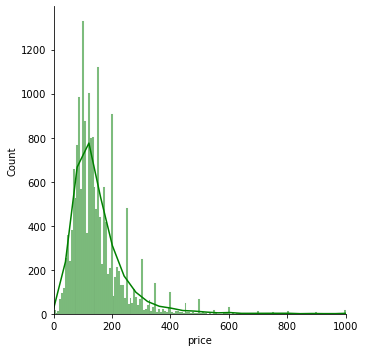

In [14]:
# create a distribution plot for price
price_dis = sns.displot(x = df['price'], color = "g", kde = True)
price_dis.set(xlim=(0, 1000))

In [15]:
df['price'].describe()

count    18522.000000
mean       153.998164
std        149.124268
min          0.000000
25%         94.000000
50%        128.000000
75%        180.000000
max       8000.000000
Name: price, dtype: float64

<AxesSubplot:>

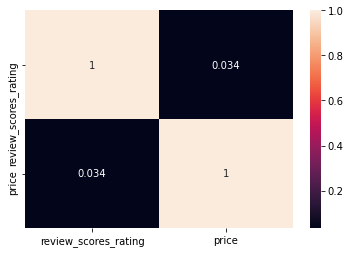

In [16]:
# determine if there is any correlation between price and review_scores_rating
price_by_rating = df[['review_scores_rating', 'price']]
sns.heatmap(price_by_rating.corr(), annot = True)

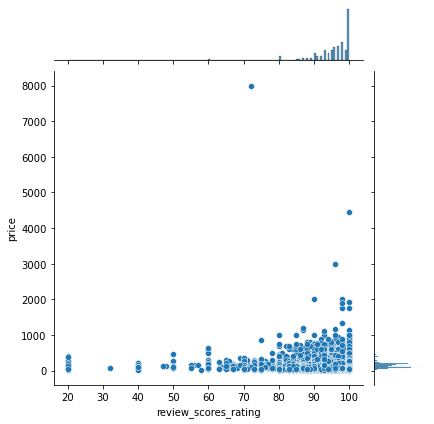

In [17]:
sns.jointplot(x = "review_scores_rating", y = "price",data = df)

Based on the distribution plot,and price.describe(), the majority of rentals have a price that is around $154. There seems to be significant skeweness to the right. There is a low correlation between price and review_scores_rating so the higher the price does not necessarily mean there will be a higher rating.

**Amenities & Accommodations Analysis**

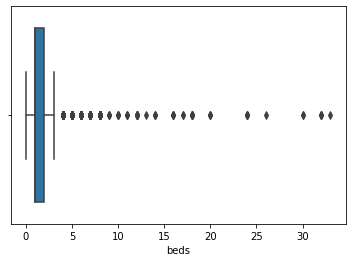

In [18]:
# boxplot for beds
sns.boxplot(x='beds', data=df);

<AxesSubplot:xlabel='bedrooms'>

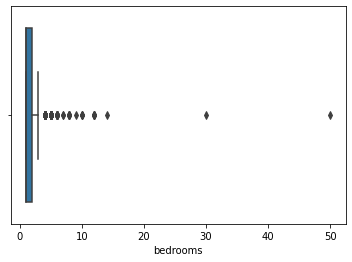

In [19]:
# boxplot for bedrooms
sns.boxplot(x='bedrooms', data=df)

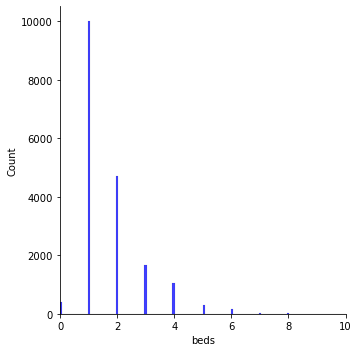

In [20]:
# create a distribution plot for number of beds
bed_dis = sns.displot(x = df['beds'], color = "b")
bed_dis.set(xlim=(0, 10))
#bed_dis.set(ylim=(0, 2000))

<AxesSubplot:>

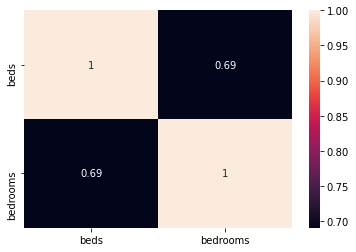

In [21]:
# determine if there is any correlation between no. beds and bedrooms
beds_bedrooms = df[['beds', 'bedrooms']]
sns.heatmap(beds_bedrooms.corr(), annot = True)

There appears to be skewness to the right for both bedrooms and beds given the outliers in the boxplots. There is a strong correlation between the number of bedrooms and beds at 0.69. The larger the number of bedrooms, the larger number of beds. 

[(0.0, 10.0)]

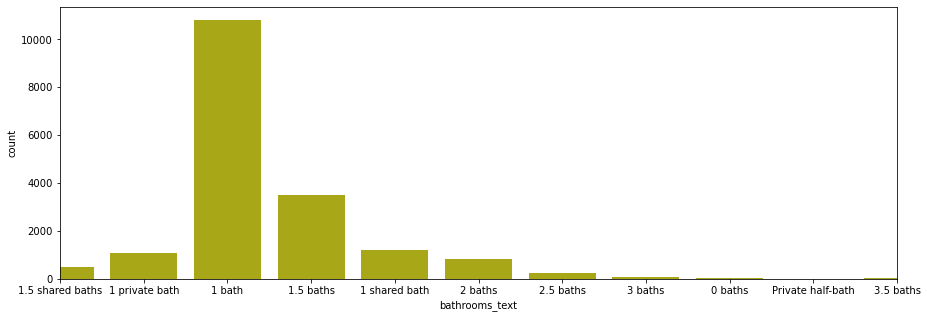

In [22]:
# create a count plot for number of baths

fig_dims = (15, 5)

fig, ax = plt.subplots(figsize=fig_dims)
bath_dis = sns.countplot(x = df['bathrooms_text'], color = "y")
bath_dis.set(xlim=(0, 10))

In [23]:
df['bathrooms_text'].describe()

count      18499
unique        26
top       1 bath
freq       10811
Name: bathrooms_text, dtype: object

The majority of rentals have 1 bath. 

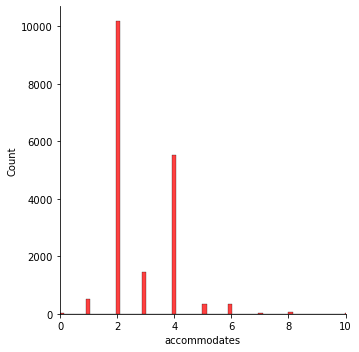

In [24]:
# create a distribution plot for number of accommodations

accommodates_dis = sns.displot(x = df['accommodates'], color = "r")
accommodates_dis.set(xlim=(0, 10))

In [25]:
df['accommodates'].describe()

count    18522.000000
mean         2.840514
std          1.285011
min          0.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

The majority of rentals can accommodate 2 people. There is some skewness to the right, with a max accommodation of 16. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Oostelijk Havengebied - Indische Buurt'),
  Text(1, 0, 'Centrum-Oost'),
  Text(2, 0, 'Centrum-West'),
  Text(3, 0, 'Zuid'),
  Text(4, 0, 'De Pijp - Rivierenbuurt'),
  Text(5, 0, 'De Baarsjes - Oud-West'),
  Text(6, 0, 'Bos en Lommer'),
  Text(7, 0, 'Westerpark'),
  Text(8, 0, 'Oud-Oost'),
  Text(9, 0, 'Noord-West'),
  Text(10, 0, 'Slotervaart'),
  Text(11, 0, 'Oud-Noord'),
  Text(12, 0, 'Buitenveldert - Zuidas'),
  Text(13, 0, 'Geuzenveld - Slotermeer'),
  Text(14, 0, 'Watergraafsmeer'),
  Text(15, 0, 'IJburg - Zeeburgereiland'),
  Text(16, 0, 'Noord-Oost'),
  Text(17, 0, 'Gaasperdam - Driemond'),
  Text(18, 0, 'Bijlmer-Oost'),
  Text(19, 0, 'Osdorp'),
  Text(20, 0, 'Bijlmer-Centrum'),
  Text(21, 0, 'De Aker - Nieuw Sloten')])

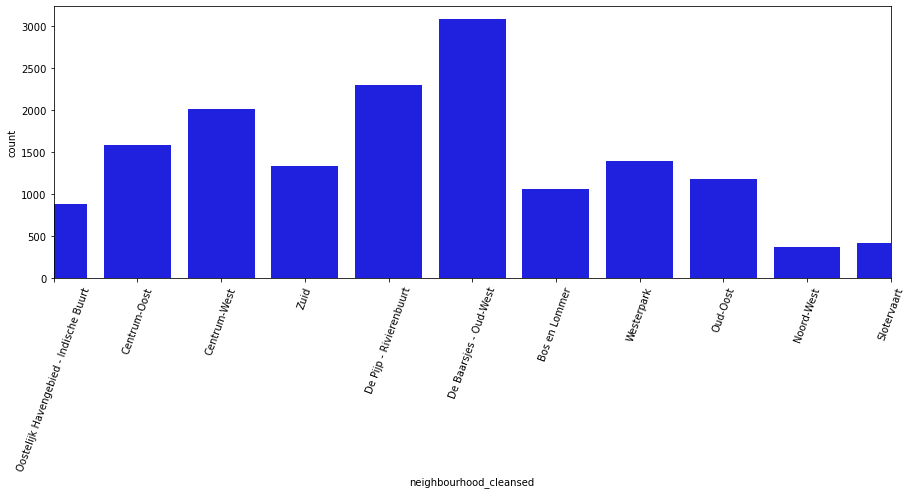

In [26]:
# create a count plot for neighborhoods

fig_dims = (15, 5)

fig, ax = plt.subplots(figsize=fig_dims)
neigh_dis = sns.countplot(x = df['neighbourhood_cleansed'], color = "b")
neigh_dis.set(xlim=(0, 10))
plt.xticks(rotation=70)

In [27]:
df['neighbourhood_cleansed'].describe()

count                      18522
unique                        22
top       De Baarsjes - Oud-West
freq                        3082
Name: neighbourhood_cleansed, dtype: object

The most amount of rentals are in De Baarsjes - Oud-West. 

[(0.0, 40.0)]

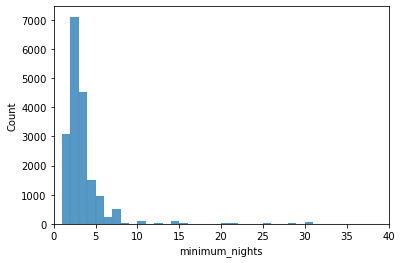

In [28]:
# histogram of minimum night stays
min_hist = sns.histplot(data=df, x="minimum_nights", binwidth=1)
min_hist.set(xlim = (0,40))

In [29]:
df['minimum_nights'].describe()

count    18522.000000
mean         3.597074
std         14.194230
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       1001.000000
Name: minimum_nights, dtype: float64

[(0.0, 1500.0)]

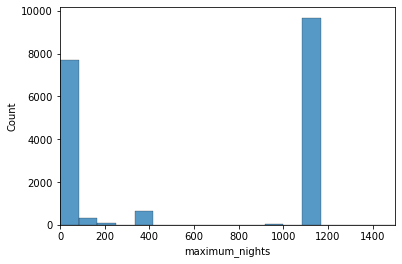

In [30]:
# histogram of max night stays

max_hist = sns.histplot(data=df, x="maximum_nights")
max_hist.set(xlim = (0,1500))

In [31]:
df['maximum_nights'].describe()

count    18522.000000
mean       614.621855
std        545.541084
min          1.000000
25%         21.000000
50%       1125.000000
75%       1125.000000
max      11250.000000
Name: maximum_nights, dtype: float64

There appears to be a large right skew for minimun nights with the mean at around 4 nights. There also appears to be potential large outliers for maximum nights with the max at 11,250 nights versus the mean at 614 nights. 

**Reviews Analysis**

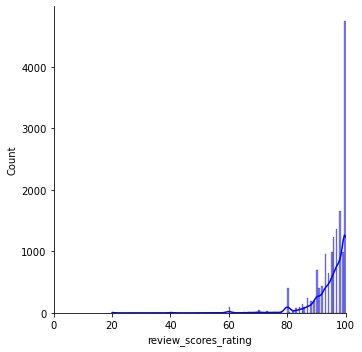

In [32]:
# create a distribution plot for review rating
review_dis = sns.displot(x = df['review_scores_rating'], color = "b", kde = True)
review_dis.set(xlim=(0, 100))

In [33]:
df['review_scores_rating'].describe()

count    15902.000000
mean        95.133568
std          6.931798
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, '20.0'),
  Text(1, 0, '32.0'),
  Text(2, 0, '40.0'),
  Text(3, 0, '47.0'),
  Text(4, 0, '48.0'),
  Text(5, 0, '50.0'),
  Text(6, 0, '55.0'),
  Text(7, 0, '56.0'),
  Text(8, 0, '57.0'),
  Text(9, 0, '58.0'),
  Text(10, 0, '60.0'),
  Text(11, 0, '63.0'),
  Text(12, 0, '64.0'),
  Text(13, 0, '65.0'),
  Text(14, 0, '66.0'),
  Text(15, 0, '67.0'),
  Text(16, 0, '68.0'),
  Text(17, 0, '69.0'),
  Text(18, 0, '70.0'),
  Text(19, 0, '71.0'),
  Text(20, 0, '72.0'),
  Text(21, 0, '73.0'),
  Text(22, 0, '74.0'),
  Text(23, 0, '75.0'),
  Text(24, 0, '76.0'),
  Text(25, 0, '77.0'),
  Text(26, 0, '78.0'),
  Text(27, 0, '79.0'),
  Text(28, 0, '80.0'),
  Text(29, 0, '81.0'),
  Text(30, 0, '82.0'),
  Text(31, 0, '83.0'),
  Text(32, 0, '84.0'),
  Text(33, 0, '85.0'),
  Text

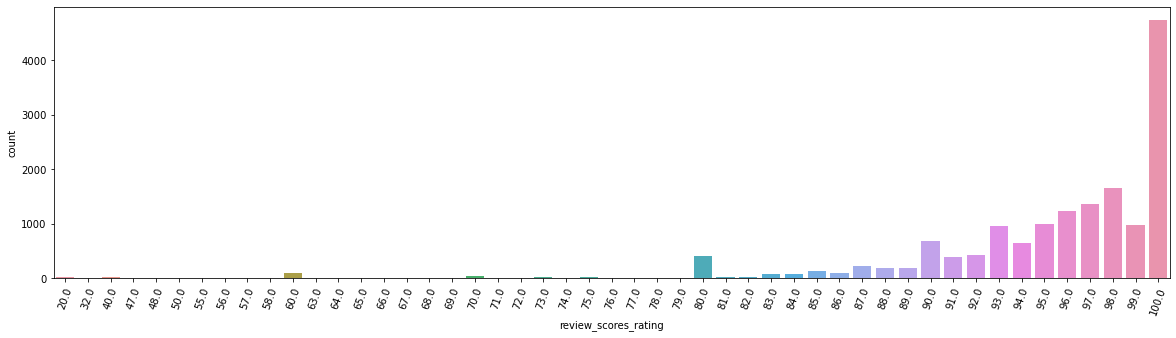

In [34]:
# create a more zoomed in version of the histogram to see the number of listings per rating score
fig_dims = (20, 5)

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'review_scores_rating', data =df)
plt.xticks(rotation=70)

From this histogram, it is clear that there is a signficant skew to the left with the lowest rating at 20 versus the mean at around 95. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Oostelijk Havengebied - Indische Buurt'),
  Text(1, 0, 'Centrum-Oost'),
  Text(2, 0, 'Centrum-West'),
  Text(3, 0, 'Zuid'),
  Text(4, 0, 'De Pijp - Rivierenbuurt'),
  Text(5, 0, 'De Baarsjes - Oud-West'),
  Text(6, 0, 'Bos en Lommer'),
  Text(7, 0, 'Westerpark'),
  Text(8, 0, 'Oud-Oost'),
  Text(9, 0, 'Noord-West'),
  Text(10, 0, 'Slotervaart'),
  Text(11, 0, 'Oud-Noord'),
  Text(12, 0, 'Buitenveldert - Zuidas'),
  Text(13, 0, 'Geuzenveld - Slotermeer'),
  Text(14, 0, 'Watergraafsmeer'),
  Text(15, 0, 'IJburg - Zeeburgereiland'),
  Text(16, 0, 'Noord-Oost'),
  Text(17, 0, 'Gaasperdam - Driemond'),
  Text(18, 0, 'Bijlmer-Oost'),
  Text(19, 0, 'Osdorp'),
  Text(20, 0, 'Bijlmer-Centrum'),
  Text(21, 0, 'De Aker - Nieuw Sloten')])

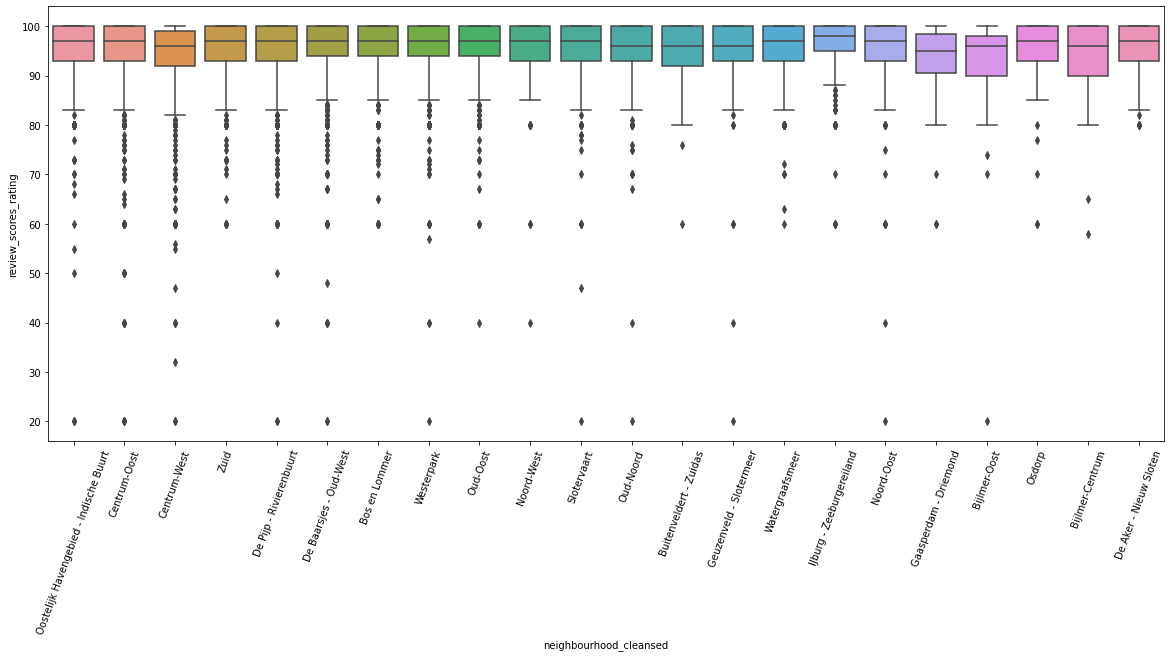

In [35]:
# checking to see if there are many outliers for review rating by neighborhood of the listing

fig_dims = (20, 8)

fig, ax = plt.subplots(figsize=fig_dims)
rating_bp = sns.boxplot(x = "neighbourhood_cleansed", y = "review_scores_rating", data = df)
plt.xticks(rotation=70)

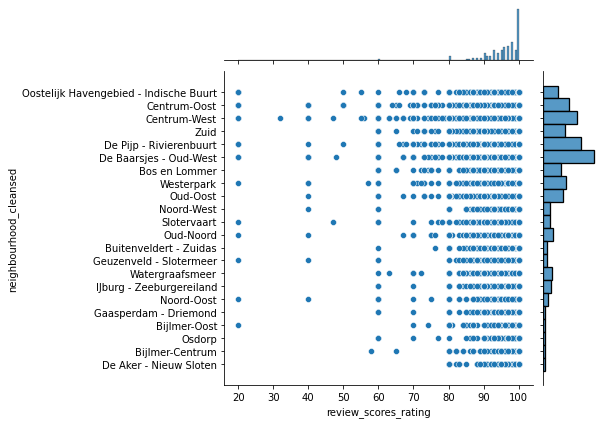

In [36]:
sns.jointplot(x = "review_scores_rating", y = "neighbourhood_cleansed",data = df)

We see a majority of review_scores_rating for all neighborhoods is >= 80 with the mean at 95. Based on the jointplot, we can see that the neighbourhoods with the most ratings are De Barrsjes - Oud - West, DePjijp - Rivierenbuurt, and Centrum-West.

In [37]:
# identify correlation between rating and review scores

ratings_df = df[['review_scores_rating',
   "review_scores_accuracy",
   "review_scores_cleanliness",
   "review_scores_checkin",
   "review_scores_communication",
   "review_scores_location",
  "review_scores_value"]]

ratings_df.corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.718045,0.685465,0.582061,0.635790,0.367314,0.685855
review_scores_accuracy,0.718045,1.000000,0.557146,0.518861,0.564224,0.316466,0.563271
review_scores_cleanliness,0.685465,0.557146,1.000000,0.419123,0.443067,0.255506,0.544723
review_scores_checkin,0.582061,0.518861,0.419123,1.000000,0.649131,0.303247,0.454755
review_scores_communication,0.635790,0.564224,0.443067,0.649131,1.000000,0.308835,0.502211
review_scores_location,0.367314,0.316466,0.255506,0.303247,0.308835,1.000000,0.376400
review_scores_value,0.685855,0.563271,0.544723,0.454755,0.502211,0.376400,1.000000


<AxesSubplot:>

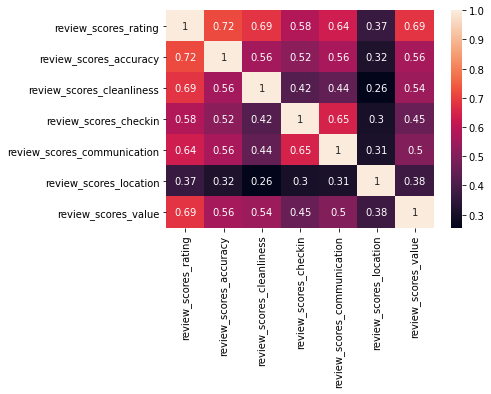

In [38]:
# create a correlation heatmap between the different ratings 
rating_heatmap = sns.heatmap(ratings_df.corr(),annot = True)
rating_heatmap

We see that there is a high correlation accuracy (0.72), cleanliness (0.69), and communication (0.64) against review_scores_rating overall. Location has the lowest correlation (< 0.4) among all scores. 

In [39]:
df['review_scores_rating'].value_counts(bins = 10)

(92.0, 100.0]     12586
(84.0, 92.0]       2386
(76.0, 84.0]        643
(68.0, 76.0]        114
(52.0, 60.0]         99
(60.0, 68.0]         25
(36.0, 44.0]         20
(19.919, 28.0]       19
(44.0, 52.0]          9
(28.0, 36.0]          1
Name: review_scores_rating, dtype: int64

**Host Analysis**

In [40]:
# calculate the number of hosts per neighborhood
df.groupby('neighbourhood_cleansed')['host_id'].count()

neighbourhood_cleansed
Bijlmer-Centrum                            106
Bijlmer-Oost                                97
Bos en Lommer                             1064
Buitenveldert - Zuidas                     248
Centrum-Oost                              1587
Centrum-West                              2019
De Aker - Nieuw Sloten                     128
De Baarsjes - Oud-West                    3082
De Pijp - Rivierenbuurt                   2305
Gaasperdam - Driemond                      119
Geuzenveld - Slotermeer                    213
IJburg - Zeeburgereiland                   440
Noord-Oost                                 260
Noord-West                                 377
Oostelijk Havengebied - Indische Buurt     886
Osdorp                                     126
Oud-Noord                                  592
Oud-Oost                                  1183
Slotervaart                                417
Watergraafsmeer                            540
Westerpark                           

<AxesSubplot:xlabel='neighbourhood_cleansed'>

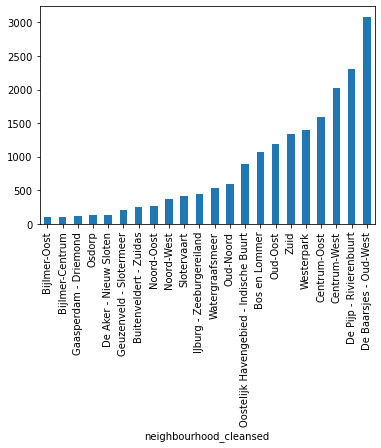

In [41]:
# plot the number of hosts per neighborhood
df.groupby(['neighbourhood_cleansed']).size().sort_values().plot(kind = "bar") 

The largest number of hosts are located in De Baarsjes - Oud-West.

**Host Tenure Analysis**

In [42]:
# create host_tenure to calculate the number of days the host has been listing on airbnb
df['host_tenure'] = df['last_scraped'] - df['host_since']
df['host_tenure'].describe()

count                           18467
mean     2042 days 13:05:18.340824160
std       781 days 04:52:53.883285064
min                   2 days 00:00:00
25%                1600 days 00:00:00
50%                2110 days 00:00:00
75%                2624 days 00:00:00
max                4463 days 00:00:00
Name: host_tenure, dtype: object

In [43]:
# convert host_tenure from datetime timedelta to float 
df['host_tenure'] = df['host_tenure'] / pd.to_timedelta(1, unit='D')
df['host_tenure'].describe()

count    18467.000000
mean      2042.545351
std        781.203401
min          2.000000
25%       1600.000000
50%       2110.000000
75%       2624.000000
max       4463.000000
Name: host_tenure, dtype: float64

In [44]:
# create host tenure by year and month

df['year_host_since'], df['month_host_since'] = df['host_since'].dt.year, df['host_since'].dt.month

In [45]:
# currently I cannot convert year and month to integer because there are NaN - note to drop NaNs later and convert to int
# df['year_host_since'].astype(int) 
# df['month_host_since'].astype(int) 

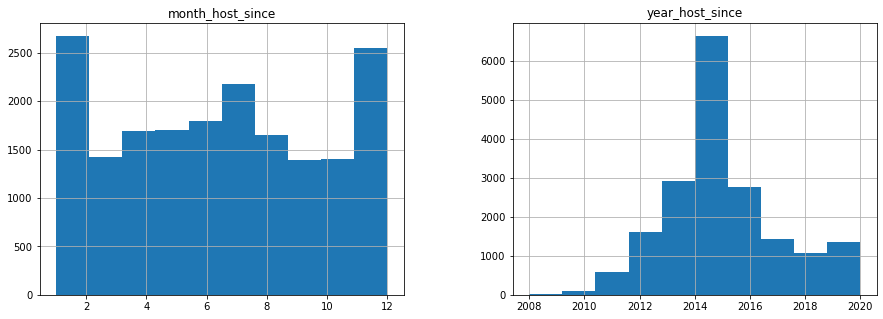

In [46]:
# create histogram plot to analyze the most popular years and months the host has been listing on Airbnb
features = ['month_host_since', 'year_host_since']
df[features].hist(figsize=(15, 5));

<AxesSubplot:xlabel='year_host_since'>

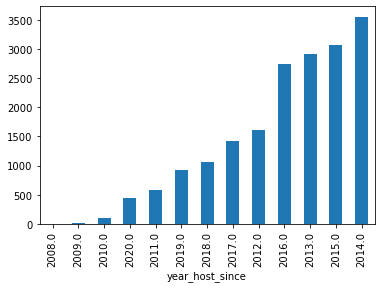

In [47]:
# plot the number of hosts per neighborhood
df.groupby(['year_host_since']).size().sort_values().plot(kind = "bar") 

<AxesSubplot:xlabel='month_host_since'>

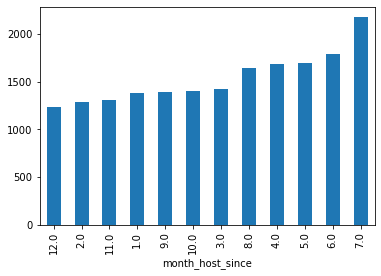

In [48]:
# plot the number of hosts per neighborhood

df.groupby(['month_host_since']).size().sort_values().plot(kind = "bar") 

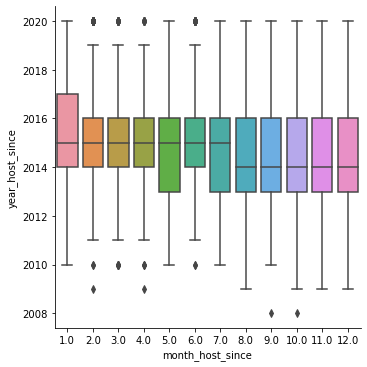

In [49]:
# create a box plot to show month vs year that the host has been listing on airbnb

sns.catplot(x="month_host_since", y="year_host_since", kind="box", data=df)

Based on the histogram and boxplots of the year and month that the host started listing on Airbnb, it appears the most popular year was 2014 and month was July.

<AxesSubplot:>

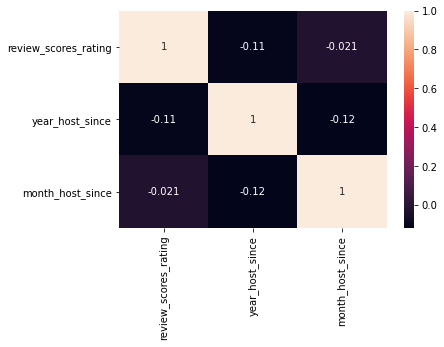

In [50]:
# identify correlation between host tenure and rating 

tenure_df = df[['review_scores_rating','year_host_since', 'month_host_since']]

tenure_df.corr()

# create a correlation heatmap between the different ratings 
sns.heatmap(tenure_df.corr(),annot = True)

There doesn't seem to be a correlation between host_tenure and the review_scores_rating. This means that just because a person has been hosting for a considerable amount of time, does not mean they necessarily will have high ratings.

In [51]:
df['first_review'].describe()

C:\Users\meltra02\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   16147
unique                   2575
top       2016-03-30 00:00:00
freq                       66
first     2009-03-30 00:00:00
last      2020-12-13 00:00:00
Name: first_review, dtype: object

In [52]:
df['last_review'].describe()

C:\Users\meltra02\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   16147
unique                   1780
top       2020-01-02 00:00:00
freq                      264
first     2012-07-26 00:00:00
last      2020-12-13 00:00:00
Name: last_review, dtype: object

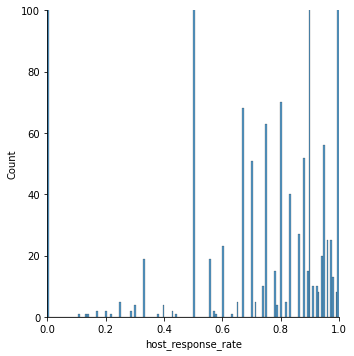

In [53]:
# distribution of host_response_rate
response_hist = sns.displot(data=df, x="host_response_rate")
response_hist.set(xlim = (0,1))
response_hist.set(ylim = (0,100))

In [54]:
df['host_response_rate'].describe()

count    4249.000000
mean        0.892530
std         0.251841
min         0.000000
25%         0.950000
50%         1.000000
75%         1.000000
max         1.000000
Name: host_response_rate, dtype: float64

For host_response_rate the mean is 89%. The distribution appears to be slightly skewed to the left. 

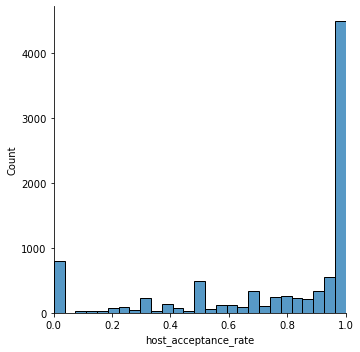

In [55]:
# histogram of host_acceptance_rate
accpt_hist = sns.displot(data=df, x="host_acceptance_rate")
accpt_hist.set(xlim = (0,1))

In [56]:
df['host_acceptance_rate'].describe()

count    9267.000000
mean        0.766421
std         0.323484
min         0.000000
25%         0.600000
50%         0.960000
75%         1.000000
max         1.000000
Name: host_acceptance_rate, dtype: float64

For host_acceptance_rate there is a skew to the left with a majority of acceptance rates at 100%.

# **2. Data Cleaning** 

Based on the previous analysis, I identified key variables to clean up to create a more focused data set. 

- **NaN** Remove columns with all NaNs. 

- **Extraneous Columns** Remove extraneous columns that are irrelevant 

- **Price (Skew):** Remove 3sd from mean. From looking at our distribution of prices, there appears to be skewness to the right which indicates outliers. 

- **Minimum_stays (Skew):** Remove 3sd from mean. From looking at our distribution of minimum_nights, there appears to be skewness to the right.

- **Accommodates (Skew)**: Remove 3sd from mean. From looking at our distribution of accommodates, there appears to be skewness to the right. 

- **Beds (Skew)**: Remove 3sd from mean. From looking at our distribution of accommodates, there appears to be skewness to the right. 

- **Bedrooms (Skew)**: Remove 3sd from mean. From looking at our distribution of accommodates, there appears to be skewness to the right. 

- **Review_scores_rating (Skew):** Remove 3sd from mean. From looking at our distribution of review_scores_rating, there appears to be skewness to the left.

- **Review date (NaN):** Remove rows where the first_review and last_review is NaN.


**NaN Data Cleaning:** Remove columns with all NaNs.

In [57]:
# set original_df to refer back to if needed
original_df = df

In [58]:
df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                             33
                                               ... 
calculated_host_listings_count_shared_rooms       0
reviews_per_month                              2375
host_tenure                                      55
year_host_since                                  55
month_host_since                                 55
Length: 77, dtype: int64

In [59]:
# remove columns that have all NaNs
filtered_df = df.loc[:, ~df.columns.isin(['neighbourhood_group_cleansed','bathrooms','calendar_updated','license'])]
filtered_df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_tenure,year_host_since,month_host_since
0,2818,https://www.airbnb.com/rooms/2818,2.020120e+13,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,t,1,0,1,0,1.95,4463.0,2008.0,9.0
1,20168,https://www.airbnb.com/rooms/20168,2.020120e+13,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,9.0,t,2,0,2,0,2.58,4029.0,2009.0,12.0
2,25428,https://www.airbnb.com/rooms/25428,2.020120e+13,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,f,1,1,0,0,0.14,4041.0,2009.0,11.0
3,27886,https://www.airbnb.com/rooms/27886,2.020120e+13,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,t,1,0,1,0,2.01,3918.0,2010.0,3.0
4,28871,https://www.airbnb.com/rooms/28871,2.020120e+13,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,f,2,0,2,0,2.68,3867.0,2010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,46938808,https://www.airbnb.com/rooms/46938808,2.020120e+13,2020-12-13,NiceAmsterdam,"This spacious, comfortable apartment is locate...",NaN,https://a0.muscache.com/pictures/e554681b-e4d9...,379294518,https://www.airbnb.com/users/show/379294518,...,NaN,t,1,1,0,0,NaN,3.0,2020.0,12.0
18518,46940774,https://www.airbnb.com/rooms/46940774,2.020120e+13,2020-12-13,Fantastic Apartment with beautiful views,"Located in super central A-location, across fr...",NaN,https://a0.muscache.com/pictures/c44f8bfd-6861...,279181956,https://www.airbnb.com/users/show/279181956,...,NaN,t,1,1,0,0,NaN,507.0,2019.0,7.0
18519,46944602,https://www.airbnb.com/rooms/46944602,2.020120e+13,2020-12-13,cozy apartment in amsterdam,NaN,NaN,https://a0.muscache.com/pictures/e2ec96ae-ecd1...,375398295,https://www.airbnb.com/users/show/375398295,...,NaN,t,2,2,0,0,NaN,31.0,2020.0,11.0
18520,46953753,https://www.airbnb.com/rooms/46953753,2.020120e+13,2020-12-13,Great luxurious apartment in city centre,"If a spacious, neat and clean suite in the cit...","The room is located in the city centre, very c...",https://a0.muscache.com/pictures/302a405d-bdbe...,379498141,https://www.airbnb.com/users/show/379498141,...,NaN,f,1,0,1,0,NaN,2.0,2020.0,12.0


In [60]:
# determine how much data we filtered from removing columns with NaN
print('Filtered dataset: ',filtered_df.shape[0] / original_df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / original_df.shape[0])*100,2), '%')
print('Removed data: ',round(100-(filtered_df.shape[0] / original_df.shape[0])*100,2), '%')

Filtered dataset:  1.0
Remaining data:  100.0 %
Removed data:  0.0 %


In [61]:
# reassign df
df = filtered_df

**Extraneous Columns Cleaning:** Remove extraneous columns.

In [62]:
# when looking at the data, there are a lot of extraneous columns that are irrelevant
filtered_df = df.loc[:, ~df.columns.isin(['scrape_id',
                 'neighborhood_overview',
                 'picture_url',
                 'host_url',
                 'host_about',
                 'host_thumbnail_url',
                 
                 'host_picture_url',
                 'neighbourhood',
                 'minimum_minimum_nights',
                 'maximum_minimum_nights',
                 'minimum_maximum_nights',
                 
                 'maximum_maximum_nights',
                'maximum_nights_avg_ntm',
                 'minimum_nights_avg_ntm',
                 'calendar_last_scraped',
                 'number_of_reviews_ltm',
                                          
                 'availability_30',
                 'availability_60',
                 'availability_90',
                 'availability_365',
                                          
                                                                 
                 'number_of_reviews_l30d',
                 'calculated_host_listings_count',
                 'calculated_host_listings_count_entire_homes',
                 'calculated_host_listings_count_private_rooms',
                 'calculated_host_listings_count_shared_rooms'])]
filtered_df

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
0,2818,https://www.airbnb.com/rooms/2818,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,9.0,10.0,t,1.95,4463.0,2008.0,9.0
1,20168,https://www.airbnb.com/rooms/20168,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2.58,4029.0,2009.0,12.0
2,25428,https://www.airbnb.com/rooms/25428,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,56142,Joan,2009-11-20,"New York, New York, United States",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,0.14,4041.0,2009.0,11.0
3,27886,https://www.airbnb.com/rooms/27886,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,t,2.01,3918.0,2010.0,3.0
4,28871,https://www.airbnb.com/rooms/28871,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,124245,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,2.68,3867.0,2010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,46938808,https://www.airbnb.com/rooms/46938808,2020-12-13,NiceAmsterdam,"This spacious, comfortable apartment is locate...",379294518,Elizabeth,2020-12-10,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,t,NaN,3.0,2020.0,12.0
18518,46940774,https://www.airbnb.com/rooms/46940774,2020-12-13,Fantastic Apartment with beautiful views,"Located in super central A-location, across fr...",279181956,Ramon,2019-07-25,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,t,NaN,507.0,2019.0,7.0
18519,46944602,https://www.airbnb.com/rooms/46944602,2020-12-13,cozy apartment in amsterdam,NaN,375398295,Danila,2020-11-12,ES,within an hour,...,NaN,NaN,NaN,NaN,NaN,t,NaN,31.0,2020.0,11.0
18520,46953753,https://www.airbnb.com/rooms/46953753,2020-12-13,Great luxurious apartment in city centre,"If a spacious, neat and clean suite in the cit...",379498141,Lisa,2020-12-11,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,2.0,2020.0,12.0


In [63]:
# determine how much data we filtered from removing extraneous columns
print('Filtered dataset: ',filtered_df.shape[0] / original_df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / original_df.shape[0])*100,2), '%')
print('Removed data: ',round(100-(filtered_df.shape[0] / original_df.shape[0])*100,2), '%')

Filtered dataset:  1.0
Remaining data:  100.0 %
Removed data:  0.0 %


In [64]:
# reassign  the df
df = filtered_df

**Price Data Cleaning: Remove 3sd from mean about 150.**
From looking at our distribution of prices, there appears to be skewness to the right which indicates outliers. 

In [65]:
# calculate mean and sd for prices 

mean = np.mean(df['price'], axis=0)
mean
sd = np.std(df['price'], axis=0)
sd

#calculate the amount to remove 
price_remove = 3*sd

# identify upper and lower bounds to remove from mean
upper = df['price'].mean() + price_remove
lower = df['price'].mean() - price_remove

print(f'Price Mean: {mean}.')
print(f'Price SD: {sd}.')

print(f'Upper price bounds: {upper}.')
print(f'Lower price bounds: {lower}.')

Price Mean: 153.99816434510313.
Price SD: 149.12024230618917.
Upper price bounds: 601.3588912636706.
Lower price bounds: -293.36256257346434.


In [66]:
# filter rows where price is 3d above and below the mean
filtered_df = df[(df['price'] >= lower) & (df['price'] < upper)]
filtered_df

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
0,2818,https://www.airbnb.com/rooms/2818,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,9.0,10.0,t,1.95,4463.0,2008.0,9.0
1,20168,https://www.airbnb.com/rooms/20168,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2.58,4029.0,2009.0,12.0
2,25428,https://www.airbnb.com/rooms/25428,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,56142,Joan,2009-11-20,"New York, New York, United States",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,0.14,4041.0,2009.0,11.0
3,27886,https://www.airbnb.com/rooms/27886,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,t,2.01,3918.0,2010.0,3.0
4,28871,https://www.airbnb.com/rooms/28871,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,124245,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,2.68,3867.0,2010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,46938808,https://www.airbnb.com/rooms/46938808,2020-12-13,NiceAmsterdam,"This spacious, comfortable apartment is locate...",379294518,Elizabeth,2020-12-10,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,t,NaN,3.0,2020.0,12.0
18518,46940774,https://www.airbnb.com/rooms/46940774,2020-12-13,Fantastic Apartment with beautiful views,"Located in super central A-location, across fr...",279181956,Ramon,2019-07-25,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,t,NaN,507.0,2019.0,7.0
18519,46944602,https://www.airbnb.com/rooms/46944602,2020-12-13,cozy apartment in amsterdam,NaN,375398295,Danila,2020-11-12,ES,within an hour,...,NaN,NaN,NaN,NaN,NaN,t,NaN,31.0,2020.0,11.0
18520,46953753,https://www.airbnb.com/rooms/46953753,2020-12-13,Great luxurious apartment in city centre,"If a spacious, neat and clean suite in the cit...",379498141,Lisa,2020-12-11,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,2.0,2020.0,12.0


In [67]:
# determine how much data we filtered from removing outliers in price
print('Filtered dataset: ',filtered_df.shape[0] / original_df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / original_df.shape[0])*100,2), '%')
print('Removed data: ',round(100-(filtered_df.shape[0] / original_df.shape[0])*100,2), '%')

Filtered dataset:  0.9923874311629414
Remaining data:  99.24 %
Removed data:  0.76 %


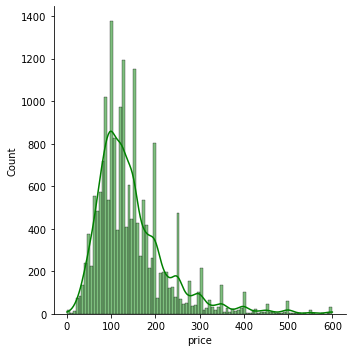

In [68]:
# create a distribution plot for price
sns.displot(x = filtered_df['price'], color = "g", kde = True)

In [69]:
# reassign df
df = filtered_df

**Minimum_stays Data Cleaning: Remove 3sd from mean about 4 nights.**
    
From looking at our distribution of minimum_nights, there appears to be skewness to the right while the mean is 4.

In [70]:
#calculate mean and sd for min_nights 

mean = np.mean(df['minimum_nights'], axis=0)
mean
sd = np.std(df['minimum_nights'], axis=0)
sd

#calculate the amount to remove 
minimum_nights_remove = 3*sd

# identify upper and lower bounds to remove from mean
upper = df['minimum_nights'].mean() + minimum_nights_remove
lower = df['minimum_nights'].mean() - minimum_nights_remove

print(f'Minimum_stays Mean: {mean}.')
print(f'Minimum_stays SD: {sd}.')

print(f'Upper minimum_nights bounds: {upper}.')
print(f'Lower minimum_nights bounds: {lower}.')

Minimum_stays Mean: 3.536151460747511.
Minimum_stays SD: 13.706811390386257.
Upper minimum_nights bounds: 44.65658563190628.
Lower minimum_nights bounds: -37.58428271041126.


In [71]:
# filter rows where minimm nights is 3sd below and above the mean
filtered_df = df[(df['minimum_nights'] >= lower) & (df['minimum_nights'] < upper)]
filtered_df

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
0,2818,https://www.airbnb.com/rooms/2818,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,9.0,10.0,t,1.95,4463.0,2008.0,9.0
1,20168,https://www.airbnb.com/rooms/20168,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2.58,4029.0,2009.0,12.0
2,25428,https://www.airbnb.com/rooms/25428,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,56142,Joan,2009-11-20,"New York, New York, United States",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,0.14,4041.0,2009.0,11.0
3,27886,https://www.airbnb.com/rooms/27886,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,t,2.01,3918.0,2010.0,3.0
4,28871,https://www.airbnb.com/rooms/28871,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,124245,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,2.68,3867.0,2010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,46938808,https://www.airbnb.com/rooms/46938808,2020-12-13,NiceAmsterdam,"This spacious, comfortable apartment is locate...",379294518,Elizabeth,2020-12-10,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,t,NaN,3.0,2020.0,12.0
18518,46940774,https://www.airbnb.com/rooms/46940774,2020-12-13,Fantastic Apartment with beautiful views,"Located in super central A-location, across fr...",279181956,Ramon,2019-07-25,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,t,NaN,507.0,2019.0,7.0
18519,46944602,https://www.airbnb.com/rooms/46944602,2020-12-13,cozy apartment in amsterdam,NaN,375398295,Danila,2020-11-12,ES,within an hour,...,NaN,NaN,NaN,NaN,NaN,t,NaN,31.0,2020.0,11.0
18520,46953753,https://www.airbnb.com/rooms/46953753,2020-12-13,Great luxurious apartment in city centre,"If a spacious, neat and clean suite in the cit...",379498141,Lisa,2020-12-11,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,2.0,2020.0,12.0


In [72]:
# determine how much data we filtered from removing outliers in min_nights

print('Filtered dataset: ',filtered_df.shape[0] / original_df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / original_df.shape[0])*100,2), '%')
print('Removed data: ',round(100-(filtered_df.shape[0] / original_df.shape[0])*100,2), '%')

Filtered dataset:  0.9885001619695497
Remaining data:  98.85 %
Removed data:  1.15 %


[(0.0, 20.0)]

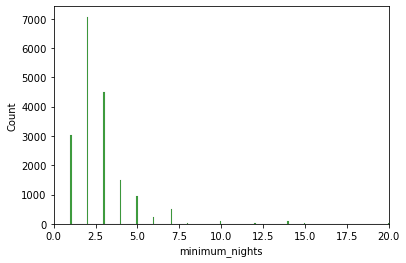

In [73]:
# create a distribution plot for minimum_nights
sns.histplot(x = filtered_df['minimum_nights'], color = "g", kde = False).set(xlim = (0,20))

In [74]:
# reassign df
df = filtered_df

**Accommodates Data Cleaning**: Remove 3sd from mean. From looking at our distribution of accommodates, there appears to be skewness to the right. 

In [75]:
#calculate mean and sd for accommodates

mean = np.mean(df['accommodates'], axis=0)
mean
sd = np.std(df['accommodates'], axis=0)
sd

#calculate the amount to remove 
accommodates_remove = 3*sd

# identify upper and lower bounds to remove from mean
upper = df['accommodates'].mean() + accommodates_remove
lower = df['accommodates'].mean() - accommodates_remove

print(f'Accommodates Mean: {mean}.')
print(f'Accommodates SD: {sd}.')

print(f'Upper accommodates bounds: {upper}.')
print(f'Lower accommodates bounds: {lower}.')

Accommodates Mean: 2.823365557922333.
Accommodates SD: 1.2345448333991242.
Upper accommodates bounds: 6.527000058119706.
Lower accommodates bounds: -0.8802689422750394.


In [76]:
# filter rows where accommodates is 3sd below and above the mean
filtered_df = df[(df['accommodates'] >= lower) & (df['accommodates'] < upper)]
filtered_df

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
0,2818,https://www.airbnb.com/rooms/2818,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,9.0,10.0,t,1.95,4463.0,2008.0,9.0
1,20168,https://www.airbnb.com/rooms/20168,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2.58,4029.0,2009.0,12.0
2,25428,https://www.airbnb.com/rooms/25428,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,56142,Joan,2009-11-20,"New York, New York, United States",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,0.14,4041.0,2009.0,11.0
3,27886,https://www.airbnb.com/rooms/27886,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,t,2.01,3918.0,2010.0,3.0
4,28871,https://www.airbnb.com/rooms/28871,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,124245,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,2.68,3867.0,2010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,46913926,https://www.airbnb.com/rooms/46913926,2020-12-13,Room for 2 facing private patio - Amsterdam ce...,Cosy room in a 2 bedroom apartment located in ...,104495359,Sebastian,2016-11-20,"Santiago, Santiago Metropolitan Region, Chile",NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,1484.0,2016.0,11.0
18517,46938808,https://www.airbnb.com/rooms/46938808,2020-12-13,NiceAmsterdam,"This spacious, comfortable apartment is locate...",379294518,Elizabeth,2020-12-10,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,t,NaN,3.0,2020.0,12.0
18519,46944602,https://www.airbnb.com/rooms/46944602,2020-12-13,cozy apartment in amsterdam,NaN,375398295,Danila,2020-11-12,ES,within an hour,...,NaN,NaN,NaN,NaN,NaN,t,NaN,31.0,2020.0,11.0
18520,46953753,https://www.airbnb.com/rooms/46953753,2020-12-13,Great luxurious apartment in city centre,"If a spacious, neat and clean suite in the cit...",379498141,Lisa,2020-12-11,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,2.0,2020.0,12.0


In [77]:
# determine how much data we filtered from removing rows where accommodates is 3sd above and below the mean

print('Filtered dataset: ',filtered_df.shape[0] / original_df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / original_df.shape[0])*100,2),'%')
print('Removed data: ',round(100-(filtered_df.shape[0] / original_df.shape[0])*100,2),'%')

Filtered dataset:  0.9810495626822158
Remaining data:  98.1 %
Removed data:  1.9 %


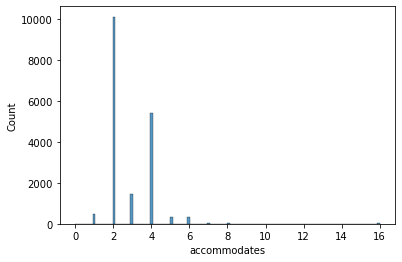

In [78]:
# histogram of accommodations

max_hist = sns.histplot(data=df, x="accommodates")

In [79]:
# reassign df
df = filtered_df

**Beds Data Cleaning**: Remove 3sd from mean. From looking at our boxplot of beds, there appears to be skewness to the right. 

In [80]:
#calculate mean and sd for beds

mean = np.mean(df['beds'], axis=0)
mean
sd = np.std(df['beds'], axis=0)
sd

#calculate the amount to remove 
beds_remove = 3*sd

# identify upper and lower bounds to remove from mean
upper = df['beds'].mean() + beds_remove
lower = df['beds'].mean() - beds_remove

print(f'Beds Mean: {mean}.')
print(f'Beds SD: {sd}.')

print(f'Upper beds bounds: {upper}.')
print(f'Lower beds bounds: {lower}.')

Beds Mean: 1.6973706061444782.
Beds SD: 1.0919154157034772.
Upper beds bounds: 4.9731168532549095.
Lower beds bounds: -1.5783756409659533.


In [81]:
# filter rows where accommodates is 3sd below and above the mean
filtered_df = df[(df['beds'] >= lower) & (df['beds'] < upper)]
filtered_df

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
0,2818,https://www.airbnb.com/rooms/2818,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,9.0,10.0,t,1.95,4463.0,2008.0,9.0
1,20168,https://www.airbnb.com/rooms/20168,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2.58,4029.0,2009.0,12.0
2,25428,https://www.airbnb.com/rooms/25428,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,56142,Joan,2009-11-20,"New York, New York, United States",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,0.14,4041.0,2009.0,11.0
3,27886,https://www.airbnb.com/rooms/27886,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,t,2.01,3918.0,2010.0,3.0
4,28871,https://www.airbnb.com/rooms/28871,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,124245,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,2.68,3867.0,2010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,46913926,https://www.airbnb.com/rooms/46913926,2020-12-13,Room for 2 facing private patio - Amsterdam ce...,Cosy room in a 2 bedroom apartment located in ...,104495359,Sebastian,2016-11-20,"Santiago, Santiago Metropolitan Region, Chile",NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,1484.0,2016.0,11.0
18517,46938808,https://www.airbnb.com/rooms/46938808,2020-12-13,NiceAmsterdam,"This spacious, comfortable apartment is locate...",379294518,Elizabeth,2020-12-10,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,t,NaN,3.0,2020.0,12.0
18519,46944602,https://www.airbnb.com/rooms/46944602,2020-12-13,cozy apartment in amsterdam,NaN,375398295,Danila,2020-11-12,ES,within an hour,...,NaN,NaN,NaN,NaN,NaN,t,NaN,31.0,2020.0,11.0
18520,46953753,https://www.airbnb.com/rooms/46953753,2020-12-13,Great luxurious apartment in city centre,"If a spacious, neat and clean suite in the cit...",379498141,Lisa,2020-12-11,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,2.0,2020.0,12.0


In [82]:
# determine how much data we filtered from removing rows where beds is 3sd above and below the mean

print('Filtered dataset: ',filtered_df.shape[0] / original_df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / original_df.shape[0])*100,2),'%')
print('Removed data: ',round(100-(filtered_df.shape[0] / original_df.shape[0])*100,2),'%')

Filtered dataset:  0.9502753482345319
Remaining data:  95.03 %
Removed data:  4.97 %


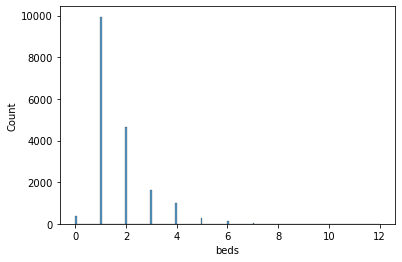

In [83]:
# histogram of beds

beds_hist = sns.histplot(data=df, x="beds")

**Bedrooms Data Cleaning**: Remove 3sd from mean. From looking at our boxplot of bedrooms, there appears to be skewness to the right. 

In [84]:
#calculate mean and sd for bedrooms

mean = np.mean(df['bedrooms'], axis=0)
mean
sd = np.std(df['bedrooms'], axis=0)
sd

#calculate the amount to remove 
beds_remove = 3*sd

# identify upper and lower bounds to remove from mean
upper = df['bedrooms'].mean() + beds_remove
lower = df['bedrooms'].mean() - beds_remove

print(f'Bedrooms Mean: {mean}.')
print(f'Bedrooms SD: {sd}.')

print(f'Upper bedrooms bounds: {upper}.')
print(f'Lower bedrooms bounds: {lower}.')

Bedrooms Mean: 1.49906792496796.
Bedrooms SD: 0.7977848966956715.
Upper bedrooms bounds: 3.8924226150549748.
Lower bedrooms bounds: -0.8942867651190547.


In [85]:
# filter rows where accommodates is 3sd below and above the mean
filtered_df = df[(df['bedrooms'] >= lower) & (df['bedrooms'] < upper)]
filtered_df

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
0,2818,https://www.airbnb.com/rooms/2818,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,9.0,10.0,t,1.95,4463.0,2008.0,9.0
1,20168,https://www.airbnb.com/rooms/20168,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2.58,4029.0,2009.0,12.0
2,25428,https://www.airbnb.com/rooms/25428,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,56142,Joan,2009-11-20,"New York, New York, United States",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,0.14,4041.0,2009.0,11.0
3,27886,https://www.airbnb.com/rooms/27886,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,t,2.01,3918.0,2010.0,3.0
4,28871,https://www.airbnb.com/rooms/28871,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,124245,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,2.68,3867.0,2010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,46913926,https://www.airbnb.com/rooms/46913926,2020-12-13,Room for 2 facing private patio - Amsterdam ce...,Cosy room in a 2 bedroom apartment located in ...,104495359,Sebastian,2016-11-20,"Santiago, Santiago Metropolitan Region, Chile",NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,1484.0,2016.0,11.0
18517,46938808,https://www.airbnb.com/rooms/46938808,2020-12-13,NiceAmsterdam,"This spacious, comfortable apartment is locate...",379294518,Elizabeth,2020-12-10,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,t,NaN,3.0,2020.0,12.0
18519,46944602,https://www.airbnb.com/rooms/46944602,2020-12-13,cozy apartment in amsterdam,NaN,375398295,Danila,2020-11-12,ES,within an hour,...,NaN,NaN,NaN,NaN,NaN,t,NaN,31.0,2020.0,11.0
18520,46953753,https://www.airbnb.com/rooms/46953753,2020-12-13,Great luxurious apartment in city centre,"If a spacious, neat and clean suite in the cit...",379498141,Lisa,2020-12-11,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,2.0,2020.0,12.0


In [86]:
# determine how much data we filtered from removing rows where bedrooms is 3sd above and below the mean

print('Filtered dataset: ',filtered_df.shape[0] / original_df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / original_df.shape[0])*100,2),'%')
print('Removed data: ',round(100-(filtered_df.shape[0] / original_df.shape[0])*100,2),'%')

Filtered dataset:  0.9037360976136486
Remaining data:  90.37 %
Removed data:  9.63 %


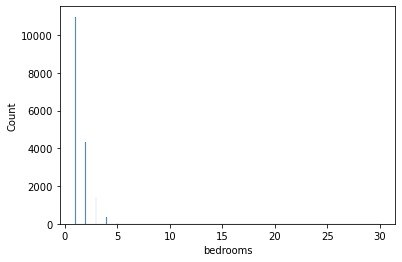

In [87]:
# histogram of bedrooms

bedrooms_hist = sns.histplot(data=df, x="bedrooms")

**Review_scores_rating Data Cleaning:** Remove reviews where there is no review.

In [88]:
rating_null = df['review_scores_rating'].isnull()
df[rating_null]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
184,517092,https://www.airbnb.com/rooms/517092,2020-12-13,4 bedroom apartment near the park,"2-story, 4-bedroom apartment in Amsterdam West...",2041793,Bas,2012-03-31,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,3179.0,2012.0,3.0
248,626872,https://www.airbnb.com/rooms/626872,2020-12-13,Beautiful Apartment Amsterdam,Beautiful apartment in the centre of Amsterdam...,3111814,Daniel,2012-07-31,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,3057.0,2012.0,7.0
280,665250,https://www.airbnb.com/rooms/665250,2020-12-13,Artists house with two gardens.,"<b>The space</b><br />This is a comfortable, c...",3361425,Marcus,2012-08-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,3033.0,2012.0,8.0
323,721897,https://www.airbnb.com/rooms/721897,2020-12-13,Spacious and cozy apartment close to Westerpark,"Spacious, cozy and clean 100sq meter apartment...",3727363,Anouk & Ivo,2012-10-01,"Amsterdam, North Holland, Netherlands",NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,2995.0,2012.0,10.0
409,833975,https://www.airbnb.com/rooms/833975,2020-12-13,"Spacious, bright apartment near RAI",Nice apartment for rent near city center. The ...,4363352,Myrna,2012-12-09,"Amsterdam, North Holland, Netherlands",NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,2926.0,2012.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,46913926,https://www.airbnb.com/rooms/46913926,2020-12-13,Room for 2 facing private patio - Amsterdam ce...,Cosy room in a 2 bedroom apartment located in ...,104495359,Sebastian,2016-11-20,"Santiago, Santiago Metropolitan Region, Chile",NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,1484.0,2016.0,11.0
18517,46938808,https://www.airbnb.com/rooms/46938808,2020-12-13,NiceAmsterdam,"This spacious, comfortable apartment is locate...",379294518,Elizabeth,2020-12-10,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,t,NaN,3.0,2020.0,12.0
18519,46944602,https://www.airbnb.com/rooms/46944602,2020-12-13,cozy apartment in amsterdam,NaN,375398295,Danila,2020-11-12,ES,within an hour,...,NaN,NaN,NaN,NaN,NaN,t,NaN,31.0,2020.0,11.0
18520,46953753,https://www.airbnb.com/rooms/46953753,2020-12-13,Great luxurious apartment in city centre,"If a spacious, neat and clean suite in the cit...",379498141,Lisa,2020-12-11,NL,NaN,...,NaN,NaN,NaN,NaN,NaN,f,NaN,2.0,2020.0,12.0


In [89]:
# setting a new df with df where review_scores_rating is not NA

filtered_df = df[df['review_scores_rating'].notna()]
filtered_df

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
0,2818,https://www.airbnb.com/rooms/2818,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,9.0,10.0,t,1.95,4463.0,2008.0,9.0
1,20168,https://www.airbnb.com/rooms/20168,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2.58,4029.0,2009.0,12.0
2,25428,https://www.airbnb.com/rooms/25428,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,56142,Joan,2009-11-20,"New York, New York, United States",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,0.14,4041.0,2009.0,11.0
3,27886,https://www.airbnb.com/rooms/27886,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,t,2.01,3918.0,2010.0,3.0
4,28871,https://www.airbnb.com/rooms/28871,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,124245,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,2.68,3867.0,2010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18445,46522591,https://www.airbnb.com/rooms/46522591,2020-12-13,Deluxe Double Farm Room at Cocomama Boutique H...,<b>The space</b><br />Staying at MAMA feels as...,372878845,Cocomama,2020-10-22,NL,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.00,52.0,2020.0,10.0
18446,46522658,https://www.airbnb.com/rooms/46522658,2020-12-13,Deluxe Double Royal room at Cocomama Boutique ...,<b>The space</b><br />Staying at MAMA feels as...,372878845,Cocomama,2020-10-22,NL,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.00,52.0,2020.0,10.0
18450,46558182,https://www.airbnb.com/rooms/46558182,2020-12-13,Dam David,Amazing Private suite in the middel of Amsterd...,327652332,Caterina,2020-01-15,Netherlands,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.00,333.0,2020.0,1.0
18452,46591961,https://www.airbnb.com/rooms/46591961,2020-12-13,Studio Apartment by Cityden Amsterdam West,One room that has it all! Enjoy the comfort an...,375961673,Cityden,2020-11-17,NL,within an hour,...,6.0,8.0,8.0,8.0,8.0,t,1.00,26.0,2020.0,11.0


In [90]:
# determine how much data we filtered from removing rows where review_scores_rating is NaN

print('Filtered dataset: ',filtered_df.shape[0] / original_df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / original_df.shape[0])*100,2), '%')
print('Removed data: ',round(100-(filtered_df.shape[0] / original_df.shape[0])*100,2), '%')

Filtered dataset:  0.8448871612136918
Remaining data:  84.49 %
Removed data:  15.51 %


In [91]:
# reassign df
df = filtered_df

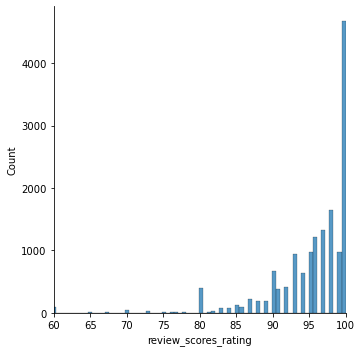

In [92]:
# looking at distribution of ratings > 60

rating_dist = sns.displot(x = 'review_scores_rating', data = df)
rating_dist.set(xlim=(60, 100))

Given the distribution of review_scores_ratings, it appears that a majority of ratings are >= 80.

**Review_scores_rating Data Cleaning:** Remove rows where review_scores_rating is above or below 3sd from mean.

In [93]:
#calculate mean and sd for review_scores_rating

mean = np.mean(df['review_scores_rating'], axis=0)
mean
sd = np.std(df['review_scores_rating'], axis=0)
sd

#calculate the amount to remove 
rating_remove = 3*sd

# identify upper and lower bounds to remove from mean
upper = df['review_scores_rating'].mean() + rating_remove
lower = df['review_scores_rating'].mean() - rating_remove

print(f'review_scores_rating Mean: {mean}.')
print(f'review_scores_rating SD: {sd}.')

print(f'Upper review_scores_rating bounds: {upper}.')
print(f'Lower review_scores_rating bounds: {lower}.')

review_scores_rating Mean: 95.14901910665218.
review_scores_rating SD: 6.928472952652169.
Upper review_scores_rating bounds: 115.93443796460869.
Lower review_scores_rating bounds: 74.36360024869566.


In [94]:
# filter rows where review_scores_rating is 3sd below and above the mean
filtered_df = df[(df['review_scores_rating'] >= lower) & (df['review_scores_rating'] < upper)]
filtered_df

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
0,2818,https://www.airbnb.com/rooms/2818,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,9.0,10.0,t,1.95,4463.0,2008.0,9.0
1,20168,https://www.airbnb.com/rooms/20168,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2.58,4029.0,2009.0,12.0
2,25428,https://www.airbnb.com/rooms/25428,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,56142,Joan,2009-11-20,"New York, New York, United States",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,0.14,4041.0,2009.0,11.0
3,27886,https://www.airbnb.com/rooms/27886,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,t,2.01,3918.0,2010.0,3.0
4,28871,https://www.airbnb.com/rooms/28871,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,124245,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,2.68,3867.0,2010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18445,46522591,https://www.airbnb.com/rooms/46522591,2020-12-13,Deluxe Double Farm Room at Cocomama Boutique H...,<b>The space</b><br />Staying at MAMA feels as...,372878845,Cocomama,2020-10-22,NL,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.00,52.0,2020.0,10.0
18446,46522658,https://www.airbnb.com/rooms/46522658,2020-12-13,Deluxe Double Royal room at Cocomama Boutique ...,<b>The space</b><br />Staying at MAMA feels as...,372878845,Cocomama,2020-10-22,NL,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.00,52.0,2020.0,10.0
18450,46558182,https://www.airbnb.com/rooms/46558182,2020-12-13,Dam David,Amazing Private suite in the middel of Amsterd...,327652332,Caterina,2020-01-15,Netherlands,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.00,333.0,2020.0,1.0
18452,46591961,https://www.airbnb.com/rooms/46591961,2020-12-13,Studio Apartment by Cityden Amsterdam West,One room that has it all! Enjoy the comfort an...,375961673,Cityden,2020-11-17,NL,within an hour,...,6.0,8.0,8.0,8.0,8.0,t,1.00,26.0,2020.0,11.0


In [95]:
# determine how much data we filtered from removing rows where review_scores_rating is 3d above and below mean

print('Filtered dataset: ',filtered_df.shape[0] / original_df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / original_df.shape[0])*100,2), '%')
print('Removed data: ',round(100-(filtered_df.shape[0] / original_df.shape[0])*100,2), '%')

Filtered dataset:  0.8312277291869129
Remaining data:  83.12 %
Removed data:  16.88 %


In [96]:
#reassign df
df = filtered_df

**Host Tenure Data Cleaning:** Drop rows where host_tenure is NaN.

In [97]:
tenure_na = df['host_tenure'].isna().sum()
year_tenure_na = df['year_host_since'].isna().sum()
month_tenure_na = df['month_host_since'].isna().sum()

print(f'Host Tenure NaN:{tenure_na}')
print(f'Year Host Since NaN:{year_tenure_na}')
print(f'Month Host Since NaN:{month_tenure_na}')

Host Tenure NaN:48
Year Host Since NaN:48
Month Host Since NaN:48


In [98]:
# filter out rows where Host Tenure is Nan
filtered_df = df[(df['host_tenure'].notna())]
filtered_df

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
0,2818,https://www.airbnb.com/rooms/2818,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,9.0,10.0,t,1.95,4463.0,2008.0,9.0
1,20168,https://www.airbnb.com/rooms/20168,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2.58,4029.0,2009.0,12.0
2,25428,https://www.airbnb.com/rooms/25428,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,56142,Joan,2009-11-20,"New York, New York, United States",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,0.14,4041.0,2009.0,11.0
3,27886,https://www.airbnb.com/rooms/27886,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,t,2.01,3918.0,2010.0,3.0
4,28871,https://www.airbnb.com/rooms/28871,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,124245,Edwin,2010-05-13,"Amsterdam, Noord-Holland, The Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,2.68,3867.0,2010.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18445,46522591,https://www.airbnb.com/rooms/46522591,2020-12-13,Deluxe Double Farm Room at Cocomama Boutique H...,<b>The space</b><br />Staying at MAMA feels as...,372878845,Cocomama,2020-10-22,NL,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.00,52.0,2020.0,10.0
18446,46522658,https://www.airbnb.com/rooms/46522658,2020-12-13,Deluxe Double Royal room at Cocomama Boutique ...,<b>The space</b><br />Staying at MAMA feels as...,372878845,Cocomama,2020-10-22,NL,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.00,52.0,2020.0,10.0
18450,46558182,https://www.airbnb.com/rooms/46558182,2020-12-13,Dam David,Amazing Private suite in the middel of Amsterd...,327652332,Caterina,2020-01-15,Netherlands,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.00,333.0,2020.0,1.0
18452,46591961,https://www.airbnb.com/rooms/46591961,2020-12-13,Studio Apartment by Cityden Amsterdam West,One room that has it all! Enjoy the comfort an...,375961673,Cityden,2020-11-17,NL,within an hour,...,6.0,8.0,8.0,8.0,8.0,t,1.00,26.0,2020.0,11.0


In [99]:
# determine how much data we filtered from removing rows where host_tenure is NaN

print('Filtered dataset: ',filtered_df.shape[0] / original_df.shape[0])
print('Remaining data: ',round((filtered_df.shape[0] / original_df.shape[0])*100,2), '%')
print('Removed data: ',round(100-(filtered_df.shape[0] / original_df.shape[0])*100,2), '%')

Filtered dataset:  0.8286362163913185
Remaining data:  82.86 %
Removed data:  17.14 %


In [100]:
#reassign df
df = filtered_df

In [101]:
df.isnull().sum()

id                                 0
listing_url                        0
last_scraped                       0
name                              24
description                      169
host_id                            0
host_name                          0
host_since                         0
host_location                     20
host_response_time             11842
host_response_rate             11842
host_acceptance_rate            7276
host_is_superhost                  0
host_neighbourhood              4774
host_listings_count                0
host_total_listings_count          0
host_verifications                 0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                     4
bedrooms                         793
b

In [102]:
df.isna().sum()

id                                 0
listing_url                        0
last_scraped                       0
name                              24
description                      169
host_id                            0
host_name                          0
host_since                         0
host_location                     20
host_response_time             11842
host_response_rate             11842
host_acceptance_rate            7276
host_is_superhost                  0
host_neighbourhood              4774
host_listings_count                0
host_total_listings_count          0
host_verifications                 0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                     4
bedrooms                         793
b

# **3. IMPUTATION**

We can see from the results above - df.isnull().sum() - that there are still NaN values for several of our columns. I will use imputation to populate these null values as necessary.

In [103]:
df.isnull

<bound method DataFrame.isnull of              id                            listing_url last_scraped  \
0          2818      https://www.airbnb.com/rooms/2818   2020-12-13   
1         20168     https://www.airbnb.com/rooms/20168   2020-12-13   
2         25428     https://www.airbnb.com/rooms/25428   2020-12-13   
3         27886     https://www.airbnb.com/rooms/27886   2020-12-13   
4         28871     https://www.airbnb.com/rooms/28871   2020-12-13   
...         ...                                    ...          ...   
18445  46522591  https://www.airbnb.com/rooms/46522591   2020-12-13   
18446  46522658  https://www.airbnb.com/rooms/46522658   2020-12-13   
18450  46558182  https://www.airbnb.com/rooms/46558182   2020-12-13   
18452  46591961  https://www.airbnb.com/rooms/46591961   2020-12-13   
18506  46866507  https://www.airbnb.com/rooms/46866507   2020-12-13   

                                                    name  \
0               Quiet Garden View Room & Super Fast W

**Bedrooms Imputation - Mean**

There are 793 missing values for bedroom. My hypothesis is that the number of bedrooms will influence the price of the listing - the more rooms the more money it will cost. Given that mean of the number of bedrooms is 1, I will impute 1 for those missing bedroom values.

In [104]:
# total number of NaN in bedrooms
df['bedrooms'].isnull().sum()

793

In [105]:
# impute NaNs with bedroom mean
df['bedrooms'].replace(np.NaN, df['bedrooms'].mean(), inplace = True)

C:\Users\meltra02\Anaconda3\lib\site-packages\pandas\core\series.py:4512: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [106]:
# convert from float to int
df['bedrooms'].astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
18445    1
18446    1
18450    2
18452    1
18506    1
Name: bedrooms, Length: 15348, dtype: int32

In [107]:
# verify that there are no NaNs in bedrooms
df['bedrooms'].isnull().sum()

0

Imputed 793 NaN values for bedrooms as 1 (mean of bedrooms).

**Beds Imputation - Mean**

Similar to Bedrooms, there are 37 NaN values for beds. I calculated the mean of the bedrooms column where beds is NaN. The mean for Bedrooms is around 1, therefore I will assume that there is 1 bed in those bedrooms. I will impute the NaN values for beds as 1.

In [108]:
df['beds'].isna().sum()

37

In [109]:
# find bedrooms where bed is NaN
df[df['beds'].isna()]['bedrooms']

495      1.000000
3243     1.000000
8024     1.000000
8505     1.493164
16080    1.000000
16399    1.000000
16843    1.000000
16890    1.000000
16940    1.000000
17065    1.000000
17146    1.000000
17153    1.000000
17253    1.000000
17366    1.000000
17430    1.000000
17464    1.000000
17466    1.000000
17486    1.000000
17626    1.000000
17627    1.000000
17749    1.000000
17897    1.493164
18004    1.000000
18050    1.000000
18069    1.493164
18075    1.000000
18080    1.000000
18120    1.000000
18126    1.000000
18127    1.000000
18145    1.493164
18146    1.000000
18165    1.000000
18166    1.000000
18319    1.493164
18356    1.000000
18383    1.000000
Name: bedrooms, dtype: float64

In [110]:
# calculate mean of bedrooms where beds is NaN
impute_beds = df[df['beds'].isna()]['bedrooms'].mean()
impute_beds

1.0666437650291993

In [111]:
# impute NaNs with mean
df['beds'].replace(np.NaN, impute_beds, inplace = True)

In [112]:
# verify that there are no NaNs in beds

df['beds'].isna().sum()

0

In [113]:
df['beds']

0        2.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
18445    1.0
18446    1.0
18450    2.0
18452    1.0
18506    0.0
Name: beds, Length: 15348, dtype: float64

Imputated 37 NaN values for beds as 1 (mean of beds).

**Host_Response_Time Imputation - Unique Value**

There are 12023 NaN values for host_response_time. If we were to remove these rows entirely, we would be removing 77% of the data which is a large subset of our data. Therefore, I will impute these NaN values with a unique identifier.

In [114]:
# calculate the % of data where host_response_time is NaN
df.isnull()['host_response_time'].sum() / df.shape[0]

0.7715663278603075

In [115]:
df['host_response_time']

0                   NaN
1                   NaN
2        within an hour
3        within an hour
4        within an hour
              ...      
18445    within an hour
18446    within an hour
18450    within an hour
18452    within an hour
18506    within an hour
Name: host_response_time, Length: 15348, dtype: object

In [116]:
# impute host_response_time with U
df['host_response_time'].fillna('U', inplace = True)

C:\Users\meltra02\Anaconda3\lib\site-packages\pandas\core\series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [117]:
df['host_response_time']

0                     U
1                     U
2        within an hour
3        within an hour
4        within an hour
              ...      
18445    within an hour
18446    within an hour
18450    within an hour
18452    within an hour
18506    within an hour
Name: host_response_time, Length: 15348, dtype: object

In [118]:
# verify that there are no NaNs in host_response_time

df.isnull()['host_response_time'].sum()

0

In [119]:
df.isnull().sum()

id                                 0
listing_url                        0
last_scraped                       0
name                              24
description                      169
host_id                            0
host_name                          0
host_since                         0
host_location                     20
host_response_time                 0
host_response_rate             11842
host_acceptance_rate            7276
host_is_superhost                  0
host_neighbourhood              4774
host_listings_count                0
host_total_listings_count          0
host_verifications                 0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                     4
bedrooms                           0
b

**Convert:** year_host_since and month_host_since to int - in my Initial Exploratory Analysis, I wanted to convert these values however I had NaNs so after cleaning up the NaN values, I converted the variables.

In [120]:
df['year_host_since'].dtypes

dtype('float64')

In [121]:
# convert from float to int
df['year_host_since'] = df['year_host_since'].astype(int)

C:\Users\meltra02\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
# confirm conversion was successful
df['year_host_since'].dtypes

dtype('int32')

In [123]:
df['month_host_since'].dtypes

dtype('float64')

In [124]:
# convert from float to int
df['month_host_since'] = df['month_host_since'].astype(int)

C:\Users\meltra02\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
# confirm conversion was successful
df['month_host_since'].dtypes

dtype('int32')

In [126]:
df['month_host_since']

0         9
1        12
2        11
3         3
4         5
         ..
18445    10
18446    10
18450     1
18452    11
18506    11
Name: month_host_since, Length: 15348, dtype: int32

In [127]:
df.describe()

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_tenure,year_host_since,month_host_since
count,1.534800e+04,1.534800e+04,3506.000000,8072.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,15348.000000,...,15341.000000,15340.000000,15333.000000,15339.000000,15334.000000,15334.000000,15348.000000,15348.000000,15348.000000,15348.000000
mean,1.907004e+07,6.007707e+07,0.899934,0.772671,2.532643,2.532643,52.365565,4.889308,2.777170,1.493164,...,9.747539,9.515319,9.790908,9.838777,9.537824,9.257076,0.654838,2089.810334,2014.740813,6.384936
std,1.198515e+07,7.730863e+07,0.246425,0.316322,10.902216,10.902216,0.016301,0.035598,1.058094,0.773076,...,0.534301,0.748225,0.516595,0.455211,0.643514,0.688134,1.176749,747.444237,2.066481,3.221234
min,2.818000e+03,3.159000e+03,0.000000,0.000000,0.000000,0.000000,52.289270,4.755940,1.000000,1.000000,...,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,0.010000,26.000000,2008.000000,1.000000
25%,9.193624e+06,8.740736e+06,1.000000,0.607500,1.000000,1.000000,52.355297,4.863530,2.000000,1.000000,...,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.140000,1639.000000,2013.000000,4.000000
50%,1.806344e+07,2.540405e+07,1.000000,0.950000,1.000000,1.000000,52.364925,4.886580,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.310000,2158.000000,2015.000000,6.000000
75%,2.764732e+07,7.763585e+07,1.000000,1.000000,1.000000,1.000000,52.375320,4.909147,4.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.630000,2648.000000,2016.000000,9.000000
max,4.686651e+07,3.759617e+08,1.000000,1.000000,567.000000,567.000000,52.426560,5.027690,6.000000,30.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,39.310000,4463.000000,2020.000000,12.000000


# **4. LINEAR REGRESSION MODELS & TESTING**

Using linear regression, I developed models and tested them to determine if there are relationships between 2 or more of the variables. Price and review_scores_rating are two variables that I explored through several linear regression models.

- The dependent features are called the dependent variables, outputs, or responses.
- The independent features are called the independent variables, inputs, or predictors.

**Exploring Skewness** 

Because linear regression models are sensitive to outliers, I explored the skewness of price and review_scores_rating to determine what data needed to be transformed prior to inputting into the model. 

*Exploring skewness for price*

Text(0.5, 0, 'Square Root Units')

<Figure size 720x540 with 0 Axes>

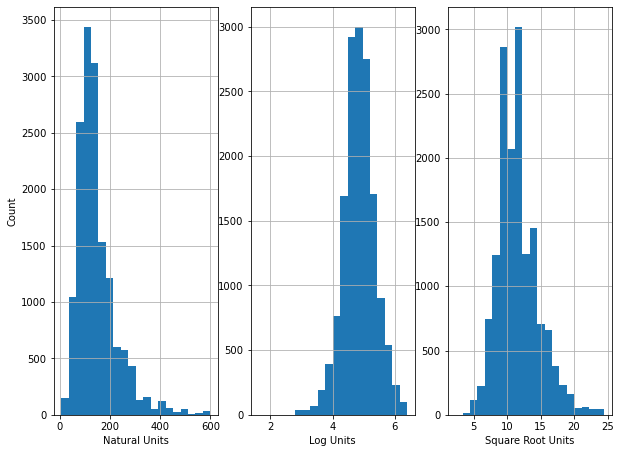

In [128]:
# determining skewness with transformations for price

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

fig_dims = (5, 20)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.hist(df['price'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')

ax2.hist(np.log(df['price'].values), bins=20)
ax2.set_xlabel('Log Units')

ax3.hist(np.sqrt(df['price'].values), bins=20)
ax3.set_xlabel('Square Root Units')

In [129]:
np.sqrt(df['price'])

0         7.681146
1        15.362291
2        11.180340
3        11.618950
4         8.660254
           ...    
18445     7.810250
18446     7.874008
18450     7.810250
18452     7.681146
18506     7.000000
Name: price, Length: 15348, dtype: float64

In [130]:
from scipy.stats import skew

price_test = df
price_test = price_test[price_test['price'].notna()]

r = np.max(price_test['price'])/np.min(price_test['price'])
skewness = skew(price_test['price'].values)

print ('Ratio of the smallest to largest value is {0} \nSample skewness statistic is {1}'.format(r, skewness))


Ratio of the smallest to largest value is 120.0 
Sample skewness statistic is 1.7802054270010497


In [131]:
np.max(df['price'])

600

In [132]:
skewness

1.7802054270010497

Text(0.5, 0, 'Transformed Data (lambda = 0.0699)')

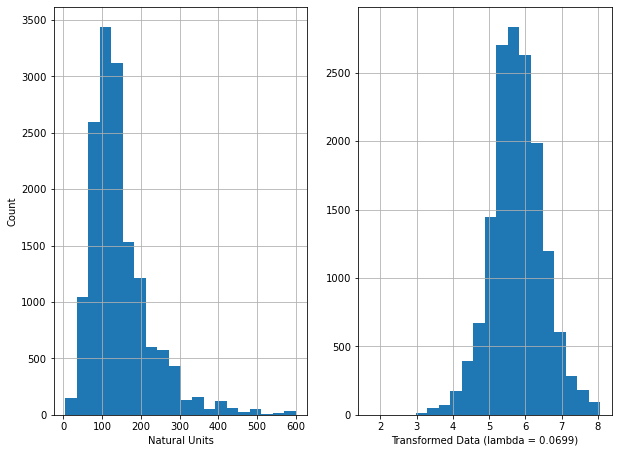

In [133]:
#using boxcox, there is an improvement with the transformation 

from scipy.stats import boxcox
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(price_test['price'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')

ax2.hist(boxcox(price_test['price'].values)[0], bins=20)
ax2.set_xlabel('Transformed Data (lambda = {:1.4f})'.format(boxcox(price_test['price'].values)[1]))

There is some skewness in the price data even after removing 3sd from the mean in our earlier analysis. Based on these transformations, the log transformation or boxcox transformation seems to work the best in normalizing the data.

*Exploring skewness for review_scores_rating*

Text(0.5, 0, 'Square Root Units')

<Figure size 720x540 with 0 Axes>

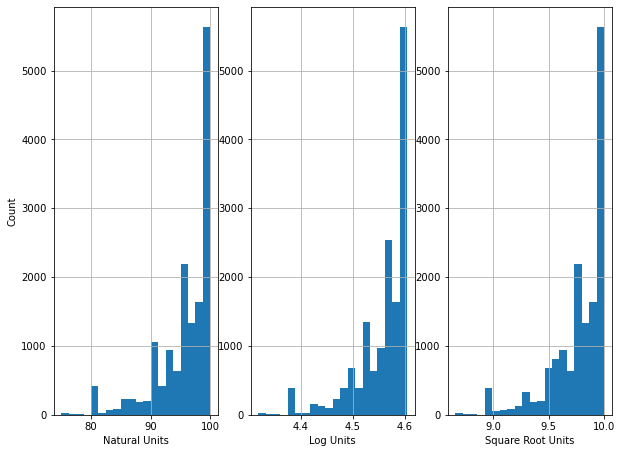

In [134]:
# determining skewness with transformations for review_scores_rating

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

fig_dims = (5, 20)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.hist(df['review_scores_rating'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')

ax2.hist(np.log(df['review_scores_rating'].values), bins=20)
ax2.set_xlabel('Log Units')

ax3.hist(np.sqrt(df['review_scores_rating'].values), bins=20)
ax3.set_xlabel('Square Root Units')


In [135]:
ratings_test = df
ratings_test = ratings_test[ratings_test['review_scores_rating'].notna()]

r = np.max(ratings_test['review_scores_rating'])/np.min(ratings_test['review_scores_rating'])
skewness = skew(ratings_test['review_scores_rating'].values)

print ('Ratio of the smallest to largest value is {0} \nSample skewness statistic is {1}'.format(r, skewness))

Ratio of the smallest to largest value is 1.3333333333333333 
Sample skewness statistic is -1.5186674865730383


In [136]:
np.max(df['review_scores_rating'])

100.0

In [137]:
skewness

-1.5186674865730383

Text(0.5, 0, 'Transformed Data (lambda = 13.8198)')

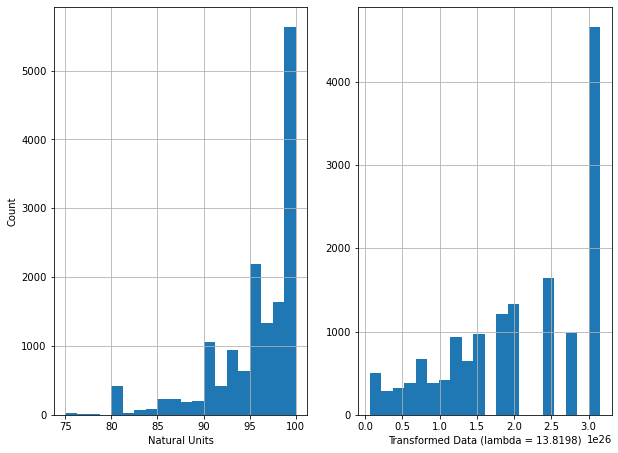

In [138]:
#using boxcox, there is an improvement with the transformation 

from scipy.stats import boxcox
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(ratings_test['review_scores_rating'].values, bins=20)
ax1.set_xlabel('Natural Units')
ax1.set_ylabel('Count')

ax2.hist(boxcox(ratings_test['review_scores_rating'].values)[0], bins=20)
ax2.set_xlabel('Transformed Data (lambda = {:1.4f})'.format(boxcox(ratings_test['review_scores_rating'].values)[1]))

There is a small amount of skewness in the reviews_score_rating data after we had removed 3sd from the mean. After performing the transformations, the log and square root transformations did not normalize the review_scores_data well. The boxcox transformation provided slightly better results.

**Linear Model Data** 

I created a test dataset based on the cleaned up df and utilized a subset of predictors from df. I also factorized categorical variables from category to numeric so that I could test these variables within my model.

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
df.shape

(15348, 48)

In [141]:
# set a test df with selected predictors so I do not overwrite my full df
test = df[["host_id", 'host_response_time',
              'neighbourhood_cleansed',
              'price',
              'accommodates', 
              'bathrooms_text', 
              'bedrooms', 
              'beds',
              'minimum_nights',
              'maximum_nights',
              'property_type',
              'room_type',
              'instant_bookable',
              'review_scores_rating',
              'review_scores_accuracy',
              'review_scores_cleanliness',
              'review_scores_checkin',
              'review_scores_communication',
              'review_scores_location',
              'review_scores_value',
              'host_tenure',
              'year_host_since',
              'month_host_since',
          ]]

In [142]:
test

,host_id,host_response_time,neighbourhood_cleansed,price,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_tenure,year_host_since,month_host_since
0,3159,U,Oostelijk Havengebied - Indische Buurt,59,2,1.5 shared baths,1.000000,2.0,3,1125,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4463.0,2008,9
1,59484,U,Centrum-Oost,236,2,1 private bath,1.000000,1.0,1,365,...,89.0,10.0,10.0,10.0,10.0,10.0,9.0,4029.0,2009,12
2,56142,within an hour,Centrum-West,125,3,1 bath,1.000000,1.0,14,180,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,4041.0,2009,11
3,97647,within an hour,Centrum-West,135,2,1.5 baths,1.000000,1.0,2,730,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,3918.0,2010,3
4,124245,within an hour,Centrum-Oost,75,2,1 shared bath,1.000000,1.0,2,1825,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,3867.0,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18445,372878845,within an hour,Centrum-Oost,61,2,1 bath,1.000000,1.0,1,365,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,52.0,2020,10
18446,372878845,within an hour,Centrum-Oost,62,2,1 bath,1.000000,1.0,1,365,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,52.0,2020,10
18450,327652332,within an hour,Centrum-West,61,4,1 bath,2.000000,2.0,1,4,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,333.0,2020,1
18452,375961673,within an hour,Bos en Lommer,59,2,1 bath,1.493164,1.0,1,365,...,80.0,8.0,6.0,8.0,8.0,8.0,8.0,26.0,2020,11


In [143]:
# use the log transformation on price to add to the data set
transformed_price = np.log(df['price'])
transformed_price

0        4.077537
1        5.463832
2        4.828314
3        4.905275
4        4.317488
           ...   
18445    4.110874
18446    4.127134
18450    4.110874
18452    4.077537
18506    3.891820
Name: price, Length: 15348, dtype: float64

In [144]:
test['transformed_price'] = transformed_price

C:\Users\meltra02\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
test['transformed_price'] .describe()

count    15348.000000
mean         4.847878
std          0.511356
min          1.609438
25%          4.553877
50%          4.828314
75%          5.164786
max          6.396930
Name: transformed_price, dtype: float64

In [146]:
test.dtypes

host_id                          int64
host_response_time              object
neighbourhood_cleansed          object
price                            int32
accommodates                     int64
bathrooms_text                  object
bedrooms                       float64
beds                           float64
minimum_nights                   int64
maximum_nights                   int64
property_type                   object
room_type                       object
instant_bookable                object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
host_tenure                    float64
year_host_since                  int32
month_host_since                 int32
transformed_price              float64
dtype: object

In [147]:
# convert category columns to numbers 

# host_response_time
catResponseTime = test['host_response_time']
codesResponseTime, uniques = pd.factorize(catResponseTime)

# neighbourhood_cleansed
catNeighbourhood = test['neighbourhood_cleansed']
codesNeighborhood, uniques = pd.factorize(catNeighbourhood)

# bathrooms_text
catBathroom = test['bathrooms_text']
codesBathroom, uniques = pd.factorize(catBathroom)

# property_type
catProperty = test['property_type']
codesProperty, uniques = pd.factorize(catProperty)

# room_type
catRoom = test['room_type']
codesRoom, uniques = pd.factorize(catRoom)

# instant_bookable
catBook = test['instant_bookable']
codesBook, uniques = pd.factorize(catBook)


In [148]:
# add converted category columns back to test data set 

# host_response_time
test['catResponseTime'] = codesResponseTime

# neighbourhood_cleansed
test['catNeighborhood'] = codesNeighborhood

# bathrooms_text
test['catBathoom'] = codesBathroom

# property_type
test['catProperty'] = codesProperty

# room_type
test['catRoom'] = codesRoom

# instant_bookable
test['catBook'] = codesBook


C:\Users\meltra02\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\meltra02\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\meltra02\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [149]:
# confirm category variables have been converted to numeric and added 
test

,host_id,host_response_time,neighbourhood_cleansed,price,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,...,host_tenure,year_host_since,month_host_since,transformed_price,catResponseTime,catNeighborhood,catBathoom,catProperty,catRoom,catBook
0,3159,U,Oostelijk Havengebied - Indische Buurt,59,2,1.5 shared baths,1.000000,2.0,3,1125,...,4463.0,2008,9,4.077537,0,0,0,0,0,0
1,59484,U,Centrum-Oost,236,2,1 private bath,1.000000,1.0,1,365,...,4029.0,2009,12,5.463832,0,1,1,1,0,0
2,56142,within an hour,Centrum-West,125,3,1 bath,1.000000,1.0,14,180,...,4041.0,2009,11,4.828314,1,2,2,2,1,1
3,97647,within an hour,Centrum-West,135,2,1.5 baths,1.000000,1.0,2,730,...,3918.0,2010,3,4.905275,1,2,3,3,0,0
4,124245,within an hour,Centrum-Oost,75,2,1 shared bath,1.000000,1.0,2,1825,...,3867.0,2010,5,4.317488,1,1,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18445,372878845,within an hour,Centrum-Oost,61,2,1 bath,1.000000,1.0,1,365,...,52.0,2020,10,4.110874,1,1,2,55,0,0
18446,372878845,within an hour,Centrum-Oost,62,2,1 bath,1.000000,1.0,1,365,...,52.0,2020,10,4.127134,1,1,2,55,0,0
18450,327652332,within an hour,Centrum-West,61,4,1 bath,2.000000,2.0,1,4,...,333.0,2020,1,4.110874,1,2,2,2,1,0
18452,375961673,within an hour,Bos en Lommer,59,2,1 bath,1.493164,1.0,1,365,...,26.0,2020,11,4.077537,1,6,2,56,0,0


In [150]:
# look at the shape
test.shape

(15348, 30)

In [151]:
# drop nas from test
test = test.dropna()
test.shape

(15325, 30)

In [152]:
# convert test df to array 
df_arr = test.to_numpy()
df_arr

array([[3159, 'U', 'Oostelijk Havengebied - Indische Buurt', ..., 0, 0,
        0],
       [59484, 'U', 'Centrum-Oost', ..., 1, 0, 0],
       [56142, 'within an hour', 'Centrum-West', ..., 2, 1, 1],
       ...,
       [327652332, 'within an hour', 'Centrum-West', ..., 2, 1, 0],
       [375961673, 'within an hour', 'Bos en Lommer', ..., 56, 0, 0],
       [159220160, 'within an hour', 'Centrum-West', ..., 4, 1, 0]],
      dtype=object)

In [153]:
a = np.array([0.0, 10.0, 20.0, 30.0])
a[:, np.newaxis]

array([[ 0.],
       [10.],
       [20.],
       [30.]])

In [154]:
# reshape the array 

df_arr[:,0].reshape(df_arr[:,0].size,1)

array([[3159],
       [59484],
       [56142],
       ...,
       [327652332],
       [375961673],
       [159220160]], dtype=object)

# 4a. Linear Regression Models - Predicting Price

In my earlier analyses, I had hypothesized that price would be influenced by these variables in the data set specifically accommodations, neighborhoods, room types and property types. Therefore, I created linear regression models to predict the price with these predictors. 

The results of the models varied with the highest R2 at  accommodates (0.26), bedrooms (0.21), beds (0.2), catRoom (0.19). The lowest R2 values were reviews_scores_rating (0.02), catNeighborhood (0.02)and catProperty (0).

A combination of these predictors can be used in the OLS model to better fit the data.

**Linear Regression Model:** accommodates x transformed_price

When initially reviewing the data and referencing my experiences with Airbnb, the price of a rental will increase depending on the number of occupants and size of the rental. Therefore, I wanted to explore the correlation between accommodates and transformed_price. From looking at the correlation plot for accommodates x price, there is some correlation between the two variables. 

<AxesSubplot:>

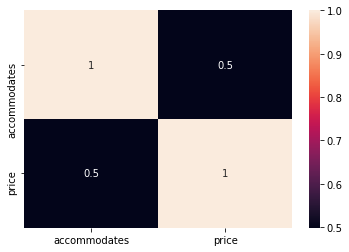

In [155]:
# determine if there is any correlation between price and accommodates
price_by_accommodates = df[['accommodates', 'price']]
sns.heatmap(price_by_accommodates.corr(), annot = True)

In [156]:
test.columns

Index(['host_id', 'host_response_time', 'neighbourhood_cleansed', 'price',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_tenure', 'year_host_since',
       'month_host_since', 'transformed_price', 'catResponseTime',
       'catNeighborhood', 'catBathoom', 'catProperty', 'catRoom', 'catBook'],
      dtype='object')

In [157]:
# assign variable x as accommodates
df_arr_X = df_arr[:, np.newaxis, 4]

# assign variable y as transformed_price
df_arr_y = df_arr[:,-7]

df_arr_X.size,df_arr_y.size

(15325, 15325)

In [158]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)

(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [159]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [0.24089018]
Mean squared error: 0.19
Variance score: 0.26


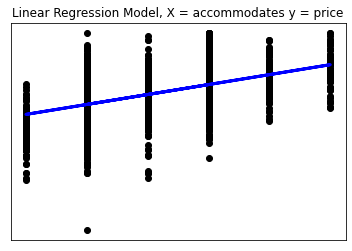

In [160]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = accommodates y = price")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

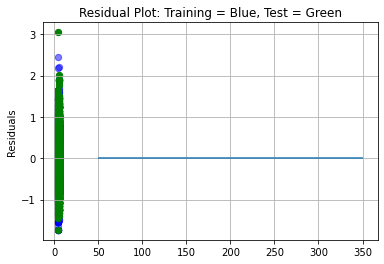

In [161]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual Plot: Training = Blue, Test = Green')
plt.ylabel('Residuals')

In [162]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 4.178223493053199 + [0.24089018]X


For the linear model regression: accommodates x price, there is a R2 of 0.26 - although this is not an extremely high R2 value, it seems that there is a relationship between accommodates and transformed_price. In the linear regression model graph, as transformed_price increases, accommodates does increase as indicated by the posititive coefficient.

**Linear Regression Model:** review_scores_rating x transformed_price

In the earlier analysis, I created a correlation plot to determine the correlation between review_scores_rating and transformed_price. I concluded that there appeared to not have a relationship between the two variables. To confirm that hypothesis, I created a linear regression model for review_scores_rating x transformed_price. 

<AxesSubplot:>

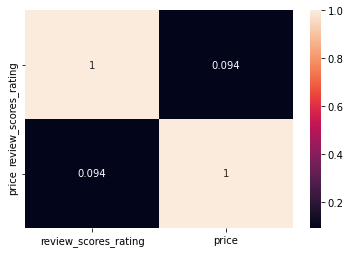

In [163]:
# determine if there is any correlation between price and accomreview_scores_ratingmodates
ratings_by_accommodates = df[['review_scores_rating', 'price']]
sns.heatmap(ratings_by_accommodates.corr(), annot = True)

In [164]:
test.columns

Index(['host_id', 'host_response_time', 'neighbourhood_cleansed', 'price',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_tenure', 'year_host_since',
       'month_host_since', 'transformed_price', 'catResponseTime',
       'catNeighborhood', 'catBathoom', 'catProperty', 'catRoom', 'catBook'],
      dtype='object')

In [165]:
# assign variable x as review_scores_rating
df_arr_X = df_arr[:, np.newaxis, 13]

# assign variable y as transformed_price
df_arr_y = df_arr[:,-7]

df_arr_X.size,df_arr_y.size

(15325, 15325)

In [166]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)


(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [167]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [0.01328879]
Mean squared error: 0.25
Variance score: 0.02


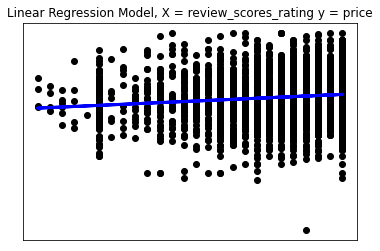

In [168]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = review_scores_rating y = price")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

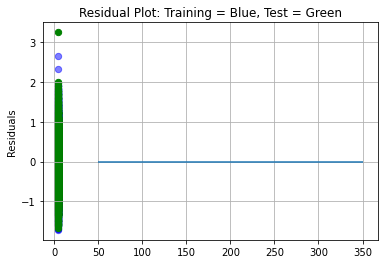

In [169]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual Plot: Training = Blue, Test = Green')
plt.ylabel('Residuals')

In [170]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 3.5747608846521572 + [0.01328879]X


As we can see from the linear regression model, while price is increasing slightly as the review_scores_rating increases, there is no clear indication of a linear relationship between the two - R2 is very low at 0.02. The test set is scattered all throughout the graph.

**Linear Regression Model:** bedrooms x transformed_price

Similar to the accommodates variable, I hypothesized that price could be influenced by the number of bedrooms in the rental. To test this, I created a linear regression model with bedrooms x price.

In [171]:
test.columns

Index(['host_id', 'host_response_time', 'neighbourhood_cleansed', 'price',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_tenure', 'year_host_since',
       'month_host_since', 'transformed_price', 'catResponseTime',
       'catNeighborhood', 'catBathoom', 'catProperty', 'catRoom', 'catBook'],
      dtype='object')

In [172]:
# assign variable x as bedrooms
df_arr_X = df_arr[:, np.newaxis, 6]

# assign variable y as transformed_price
df_arr_y = df_arr[:,-7]

df_arr_X.size,df_arr_y.size

(15325, 15325)

In [173]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)

(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [174]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [0.26803446]
Mean squared error: 0.20
Variance score: 0.21


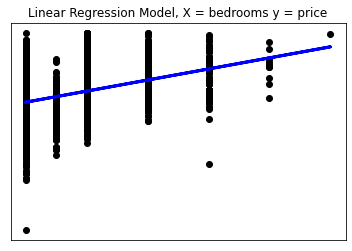

In [175]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = bedrooms y = price")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

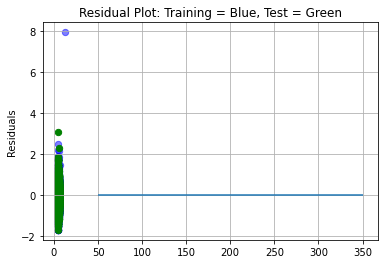

In [176]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual Plot: Training = Blue, Test = Green')
plt.ylabel('Residuals')

In [177]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 4.4478129885418145 + [0.26803446]X


For the linear model regression: bedrooms x transformed_price, there is a R2 of 0.21 - it seems that there is a relationship between bedrooms and price for the given subset of our data.

**Linear Regression Model:** beds x transformed_price

Similar to the bedrooms variable, I hypothesized that price could be influenced by the number of beds in the rental. To test this, I created a linear regression model with beds x transformed_price.

In [178]:
test.columns

Index(['host_id', 'host_response_time', 'neighbourhood_cleansed', 'price',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_tenure', 'year_host_since',
       'month_host_since', 'transformed_price', 'catResponseTime',
       'catNeighborhood', 'catBathoom', 'catProperty', 'catRoom', 'catBook'],
      dtype='object')

In [179]:
# assign variable x as beds
df_arr_X = df_arr[:, np.newaxis, 7]

# assign variable y as transformed_price
df_arr_y = df_arr[:,-7]

df_arr_X.size,df_arr_y.size

(15325, 15325)

In [180]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)


(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [181]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [0.18858207]
Mean squared error: 0.21
Variance score: 0.18


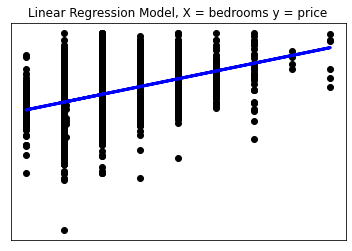

In [182]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = bedrooms y = price")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

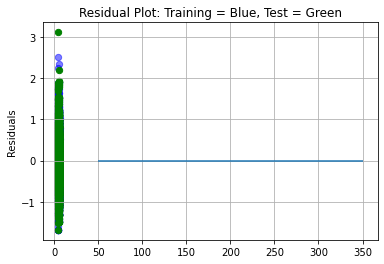

In [183]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual Plot: Training = Blue, Test = Green')
plt.ylabel('Residuals')

In [184]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 4.5280479473318 + [0.18858207]X


For the linear model regression: beds x transformed_price, there is a R2 of 0.18 which is low however, it seems that there is some relationship between bedrooms and price for the given subset of our data - as number of beds increase, the price also increases.

**Linear Regression:** catNeighborhood x transformed_price

Earlier in this section, when I compiled the test dataframe, I converted the categorical predictors into numerics so that I can test via linear regression model - catNeighborhood. I hypothesized that the neighborhood can influence the price of the rental because some neighborhoods might be more affluent than others. 

In [185]:
test.columns

Index(['host_id', 'host_response_time', 'neighbourhood_cleansed', 'price',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_tenure', 'year_host_since',
       'month_host_since', 'transformed_price', 'catResponseTime',
       'catNeighborhood', 'catBathoom', 'catProperty', 'catRoom', 'catBook'],
      dtype='object')

In [186]:
# assign variable x as catNeighborhood
df_arr_X = df_arr[:, np.newaxis, -5]

# assign variable y as transformed_price
df_arr_y = df_arr[:,-7]

df_arr_X.size,df_arr_y.size


(15325, 15325)

In [187]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)

(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [188]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [-0.01709513]
Mean squared error: 0.25
Variance score: 0.02


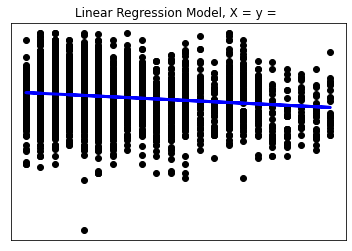

In [189]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = y = ")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

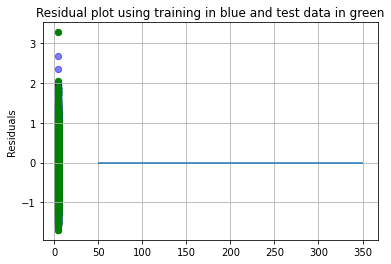

In [190]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual plot using training in blue and test data in green')
plt.ylabel('Residuals')

In [191]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 4.946928437643607 + [-0.01709513]X


For the linear regression model: catNeighborhood x transformed_price, the R2 value was low at 0.02. The linear model plot does not show a strong linear relationship between the neighborhood and the price.

**Linear Regression:** catRoom x transformed_price

Room_types consist of "Entire House/Apt", "Hotel Room", "Private Room", "Shared Room"

I hypothesized that the type of room can influence the price of the rental because more private rooms typically cost more than shared rooms.

In [192]:
test.columns

Index(['host_id', 'host_response_time', 'neighbourhood_cleansed', 'price',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_tenure', 'year_host_since',
       'month_host_since', 'transformed_price', 'catResponseTime',
       'catNeighborhood', 'catBathoom', 'catProperty', 'catRoom', 'catBook'],
      dtype='object')

In [193]:
# assign variable x as catRoom
df_arr_X = df_arr[:, np.newaxis, -2]

# assign variable y as transformed_price
df_arr_y = df_arr[:,-7]

df_arr_X.size,df_arr_y.size


(15325, 15325)

In [194]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)

(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [195]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [0.50044463]
Mean squared error: 0.21
Variance score: 0.19


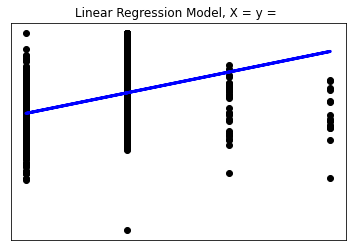

In [196]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = y = ")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

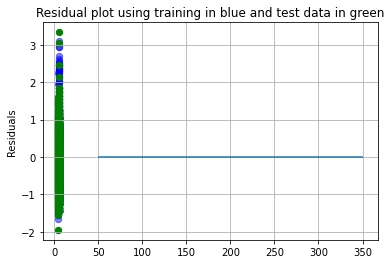

In [197]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual plot using training in blue and test data in green')
plt.ylabel('Residuals')

In [198]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 4.44383970455992 + [0.50044463]X


For the linear regression model: catRoom x transformed_price, the R2 value was low at 0.19. The linear model plot does not show a strong linear relationship between the type of room and the price however it seems price varies based on the room type.

**Linear Regression:** catProperty x transformed_price

Similar to catRoom, I performed a regression model for catProperty. I hypothesized that the type of property can influence the price of the rental.

In [199]:
test.columns

Index(['host_id', 'host_response_time', 'neighbourhood_cleansed', 'price',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_tenure', 'year_host_since',
       'month_host_since', 'transformed_price', 'catResponseTime',
       'catNeighborhood', 'catBathoom', 'catProperty', 'catRoom', 'catBook'],
      dtype='object')

In [200]:
# assign variable x as catProperty
df_arr_X = df_arr[:, np.newaxis, -3]

# assign variable y as transformed_price
df_arr_y = df_arr[:,-7]

df_arr_X.size,df_arr_y.size


(15325, 15325)

In [201]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)


(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [202]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [-0.00016977]
Mean squared error: 0.26
Variance score: -0.00


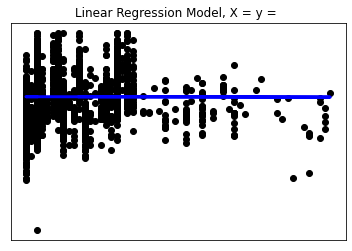

In [203]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = y = ")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

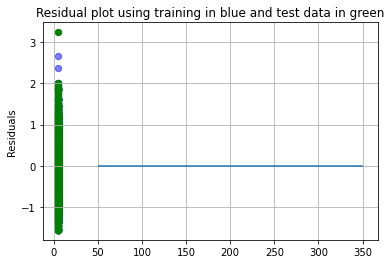

In [204]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual plot using training in blue and test data in green')
plt.ylabel('Residuals')

In [205]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 4.8479951097311 + [-0.00016977]X


There appears to be no relationship between catProperty and transformed_price with R2 value at 0.00.

# 4b. Linear Regression Models - Predicting Reviews_Scores_Rating

In my earlier analysis, I create a correlation plot between review_scores_rating and the various review ratings (accuracy, cleanliness, check-in, communication, location, and value. I hypothesized that these rating factors could influence the review_scores rating. I created linear regression models to predict the reviews_scores_rating with these predictors. 

Based on the results of each model, there appears to be some relationship between review_scores_rating and the review factors. Most notably, the models with the largest R2 values at 0.31 were the review_scores_accuracy and review_scores_cleanliness. The model with the lowest R2 value at 0.08 was review_scores_location. A combination of these predictors can be used in the OLS model to better fit the data.

<AxesSubplot:>

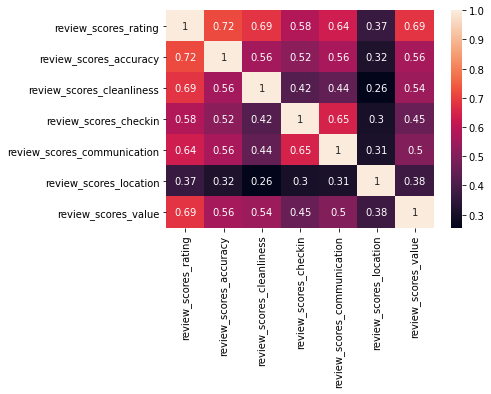

In [206]:
rating_heatmap = sns.heatmap(ratings_df.corr(),annot = True)
rating_heatmap

**Linear Regression Model:** review_scores_accuracy x reviews_scores_rating

In [207]:
test.columns

Index(['host_id', 'host_response_time', 'neighbourhood_cleansed', 'price',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_tenure', 'year_host_since',
       'month_host_since', 'transformed_price', 'catResponseTime',
       'catNeighborhood', 'catBathoom', 'catProperty', 'catRoom', 'catBook'],
      dtype='object')

In [208]:
# assign variable x as review_scores_accuracy
df_arr_X = df_arr[:, np.newaxis, 14]

# assign variable y as review_scores_rating
df_arr_y = df_arr[:,13]

df_arr_X.size,df_arr_y.size

(15325, 15325)

In [209]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)

(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [210]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [5.19614195]
Mean squared error: 16.62
Variance score: 0.31


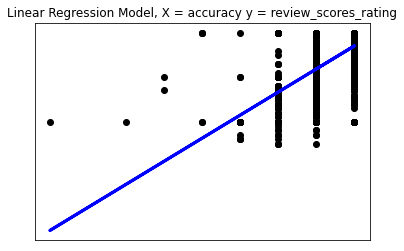

In [211]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = accuracy y = review_scores_rating")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

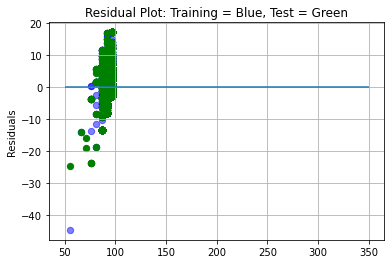

In [212]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual Plot: Training = Blue, Test = Green')
plt.ylabel('Residuals')

In [213]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 45.079038000050666 + [5.19614195]X


For the linear regression model: review_scores_accuracy x review_scores_rating, there was a R2 value of 0.31. The plot indicates a linear relationship in our given subset of the data. There seems to be outliers which could affect the fit. 

**Linear Regression Model:** review_scores_cleanliness x review_scores_rating

In [214]:
# assign variable x as review_scores_cleanliness
df_arr_X = df_arr[:, np.newaxis, 15]

# assign variable y as review_scores_rating
df_arr_y = df_arr[:,13]

df_arr_X.size,df_arr_y.size

(15325, 15325)

In [215]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)


(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [216]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [3.784062]
Mean squared error: 16.43
Variance score: 0.31


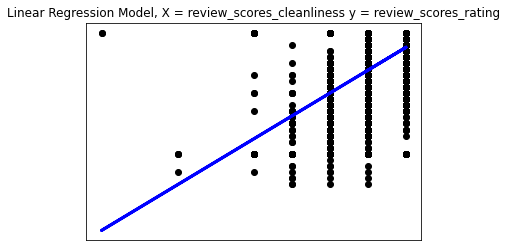

In [217]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = review_scores_cleanliness y = review_scores_rating")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

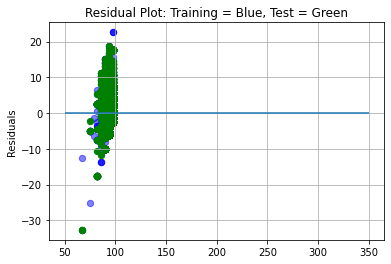

In [218]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual Plot: Training = Blue, Test = Green')
plt.ylabel('Residuals')

In [219]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 59.7486026690269 + [3.784062]X


For the linear regression model: review_scores_cleanliness x review_scores_rating, there was a R2 value of 0.31. The plot indicates a linear relationship in our given subset of the data. There seems to be outliers which could affect the fit. 

**Linear Regression Model:** review_scores_communication x review_scores_rating

In [220]:
test.columns

Index(['host_id', 'host_response_time', 'neighbourhood_cleansed', 'price',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_tenure', 'year_host_since',
       'month_host_since', 'transformed_price', 'catResponseTime',
       'catNeighborhood', 'catBathoom', 'catProperty', 'catRoom', 'catBook'],
      dtype='object')

In [221]:
# assign variable x as review_scores_communication
df_arr_X = df_arr[:, np.newaxis, 17]

# assign variable y as review_scores_rating
df_arr_y = df_arr[:,13]

df_arr_X.size,df_arr_y.size

(15325, 15325)

In [222]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)


(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [223]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [4.80425008]
Mean squared error: 19.11
Variance score: 0.20


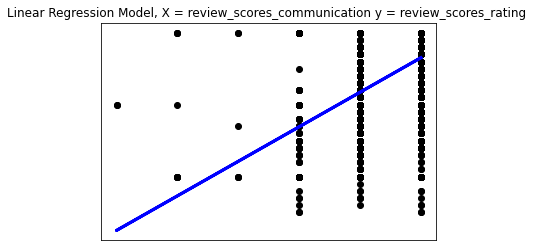

In [224]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = review_scores_communication y = review_scores_rating ")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

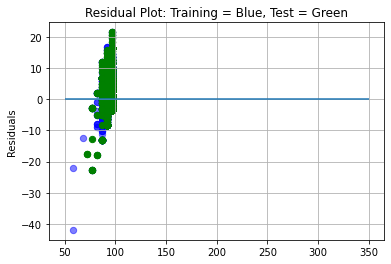

In [225]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual Plot: Training = Blue, Test = Green')
plt.ylabel('Residuals')

In [226]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 48.483381129781584 + [4.80425008]X


For the linear regression model: review_scores_communication x review_scores_rating, there was a R2 value of 0.2. The plot indicates a linear relationship in our given subset of the data - specifically in the right upper hand cluster. There seems to be some outliers which could affect the fit. 

**Linear Regression Model:** review_scores_location x review_scores_rating

In [227]:
test.columns

Index(['host_id', 'host_response_time', 'neighbourhood_cleansed', 'price',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'instant_bookable',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_tenure', 'year_host_since',
       'month_host_since', 'transformed_price', 'catResponseTime',
       'catNeighborhood', 'catBathoom', 'catProperty', 'catRoom', 'catBook'],
      dtype='object')

In [228]:
# assign variable x as review_scores_location
df_arr_X = df_arr[:, np.newaxis, -12]

# assign variable y as review_scores_rating
df_arr_y = df_arr[:,13]

df_arr_X.size,df_arr_y.size

(15325, 15325)

In [229]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)

(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [230]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [2.11518673]
Mean squared error: 21.98
Variance score: 0.08


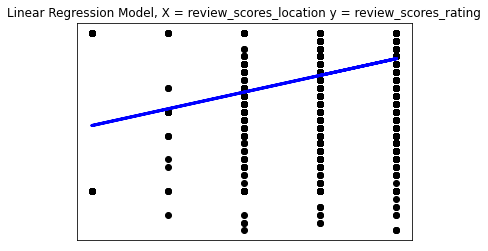

In [231]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = review_scores_location y = review_scores_rating")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

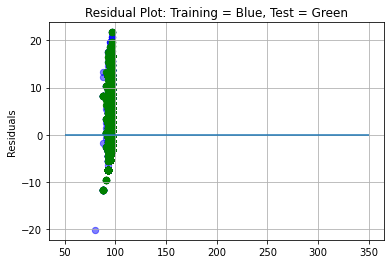

In [232]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual Plot: Training = Blue, Test = Green')
plt.ylabel('Residuals')

In [233]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 75.57307931045031 + [2.11518673]X


For the linear regression model: review_scores_cleanliness x review_scores_location, there is a low R2 value at 0.08 which indicates there is not a strong relationship between the two variables.

**Linear Regression Model:** review_scores_value x review_scores_rating

In [234]:
# assign variable x as review_scores_value
df_arr_X = df_arr[:, np.newaxis, 19]

# assign variable y as review_scores_rating
df_arr_y = df_arr[:,13]

df_arr_X.size,df_arr_y.size

(15325, 15325)

In [235]:
# using the train_test_split
import sklearn
df_arr_X_train, df_arr_X_test, df_arr_y_train, df_arr_y_test = sklearn.model_selection.train_test_split(
    df_arr_X, df_arr_y, test_size = 0.33, random_state = 5)
print (df_arr_X_train.shape)
print (df_arr_X_test.shape)
print (df_arr_y_train.shape)
print (df_arr_y_test.shape)


(10267, 1)
(5058, 1)
(10267,)
(5058,)


In [236]:
#create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(df_arr_X_train, df_arr_y_train)

# make predictions using the testing set
df_arr_y_pred = regr.predict(df_arr_X_test)
df_arr_y_pred

print(f'(X_test size: {df_arr_X_test.size}')
print(f'(y_pred size: {df_arr_y_pred.size}')

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(df_arr_y_test, df_arr_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_arr_y_test, df_arr_y_pred))

(X_test size: 5058
(y_pred size: 5058
Coefficients: 
 [3.83781348]
Mean squared error: 16.95
Variance score: 0.29


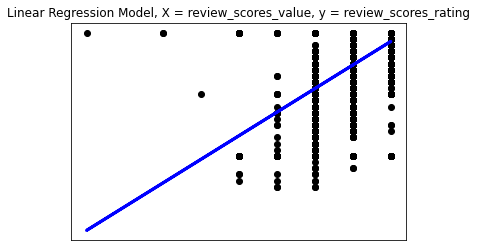

In [237]:
# Plot outputs
plt.scatter(df_arr_X_test, df_arr_y_test,  color='black')
plt.plot(df_arr_X_test, df_arr_y_pred, color='blue', linewidth=3)
plt.title("Linear Regression Model, X = review_scores_value, y = review_scores_rating")
plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Residuals')

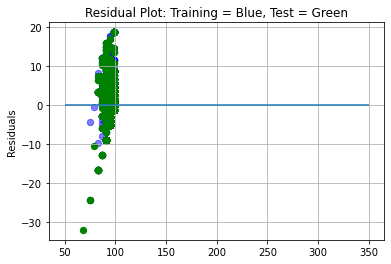

In [238]:
plt.scatter(regr.predict(df_arr_X_train),regr.predict(df_arr_X_train)-df_arr_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(df_arr_X_test),regr.predict(df_arr_X_test)-df_arr_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual Plot: Training = Blue, Test = Green')
plt.ylabel('Residuals')

In [239]:
print(f'The linear model is Y = {regr.intercept_} + {regr.coef_}X')

The linear model is Y = 60.22476804926933 + [3.83781348]X


For the linear regression model: review_scores_value x review_scores_rating, there was a R2 value of 0.29. The plot indicates a linear relationship in our given subset of the data - specifically in the right upper hand cluster. There seems to be some outliers which could affect the fit. 

# **5. OLS REGRESSION ANALYSIS**

Based on my results of the linear regression model testing, I created OLS regression models for review_scores_rating and price. Depending on the results from the previous testing, I utilized those predictors in building my OLS models.

In [240]:
from patsy import dmatrices
import pandas
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf


In [241]:
df.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_tenure', 'year_host_since', 'month_host_since'],


In [242]:
# assign the variables as the column names

vars = list(df.columns)
ols_df = df[vars]
ols_df[-10:]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_tenure,year_host_since,month_host_since
18383,46168412,https://www.airbnb.com/rooms/46168412,2020-12-13,Amsterdam appartement met tuin,Heerlijk modern en luxe ingericht appartement ...,374038224,Marjolijn,2020-11-01,NL,within an hour,...,10.0,10.0,10.0,10.0,10.0,f,1.0,42.0,2020,11
18384,46171666,https://www.airbnb.com/rooms/46171666,2020-12-13,Beautiful apartment with balcony near Vondelpark,Luxury and private apartment in an authentic o...,50748400,Nout&Lotte,2015-12-07,"Amsterdam, North Holland, Netherlands",within an hour,...,9.0,10.0,10.0,10.0,9.0,t,2.0,1833.0,2015,12
18391,46213742,https://www.airbnb.com/rooms/46213742,2020-12-13,"Bright, clean and local apartment in a vivid a...","BRIGHT, CLEAN, COMFORTABLE and STYLISH apartme...",16177681,Tommy,2014-05-30,"Amsterdam, North Holland, Netherlands",within an hour,...,9.0,10.0,9.0,10.0,9.0,f,3.0,2389.0,2014,5
18437,46504341,https://www.airbnb.com/rooms/46504341,2020-12-13,1 min from central station Private apartment,Amazing Private apartment only two minutes wal...,327652332,Caterina,2020-01-15,Netherlands,within an hour,...,8.0,6.0,8.0,10.0,10.0,t,1.0,333.0,2020,1
18442,46522370,https://www.airbnb.com/rooms/46522370,2020-12-13,Private 4 bed ensuite dorm at Cocomama Boutiqu...,<b>The space</b><br />Staying at MAMA feels as...,372878845,Cocomama,2020-10-22,NL,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.0,52.0,2020,10
18445,46522591,https://www.airbnb.com/rooms/46522591,2020-12-13,Deluxe Double Farm Room at Cocomama Boutique H...,<b>The space</b><br />Staying at MAMA feels as...,372878845,Cocomama,2020-10-22,NL,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.0,52.0,2020,10
18446,46522658,https://www.airbnb.com/rooms/46522658,2020-12-13,Deluxe Double Royal room at Cocomama Boutique ...,<b>The space</b><br />Staying at MAMA feels as...,372878845,Cocomama,2020-10-22,NL,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.0,52.0,2020,10
18450,46558182,https://www.airbnb.com/rooms/46558182,2020-12-13,Dam David,Amazing Private suite in the middel of Amsterd...,327652332,Caterina,2020-01-15,Netherlands,within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.0,333.0,2020,1
18452,46591961,https://www.airbnb.com/rooms/46591961,2020-12-13,Studio Apartment by Cityden Amsterdam West,One room that has it all! Enjoy the comfort an...,375961673,Cityden,2020-11-17,NL,within an hour,...,6.0,8.0,8.0,8.0,8.0,t,1.0,26.0,2020,11
18506,46866507,https://www.airbnb.com/rooms/46866507,2020-12-13,Studio 420 @ City Centre,Have the best Smokers-friendly stay in Amsterd...,159220160,Lydia,2017-11-18,"Amsterdam, North Holland, Netherlands",within an hour,...,10.0,10.0,10.0,10.0,10.0,t,1.0,1121.0,2017,11


In [243]:
# convert category columns to numbers 

# host_response_time
catResponseTime = ols_df['host_response_time']
codesResponseTime, uniques = pd.factorize(catResponseTime)

# neighbourhood_cleansed
catNeighbourhood = ols_df['neighbourhood_cleansed']
codesNeighborhood, uniques = pd.factorize(catNeighbourhood)

# bathrooms_text
catBathroom = ols_df['bathrooms_text']
codesBathroom, uniques = pd.factorize(catBathroom)

# property_type
catProperty = ols_df['property_type']
codesProperty, uniques = pd.factorize(catProperty)

# room_type
catRoom = ols_df['room_type']
codesRoom, uniques = pd.factorize(catRoom)

# instant_bookable
catBook = ols_df['instant_bookable']
codesBook, uniques = pd.factorize(catBook)

# add converted category columns back to ols_df data set 

# host_response_time
ols_df['catResponseTime'] = codesResponseTime

# neighbourhood_cleansed
ols_df['catNeighborhood'] = codesNeighborhood

# bathrooms_text
ols_df['catBathroom'] = codesBathroom

# property_type
ols_df['catProperty'] = codesProperty

# room_type
ols_df['catRoom'] = codesRoom

# instant_bookable
ols_df['catBook'] = codesBook





# add transformed price 
# instant_bookable
ols_df['transformed_price'] = test['transformed_price']

In [244]:
ols_df.isnull().sum()

id                                 0
listing_url                        0
last_scraped                       0
name                              24
description                      169
host_id                            0
host_name                          0
host_since                         0
host_location                     20
host_response_time                 0
host_response_rate             11842
host_acceptance_rate            7276
host_is_superhost                  0
host_neighbourhood              4774
host_listings_count                0
host_total_listings_count          0
host_verifications                 0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                     4
bedrooms                           0
b

In [245]:
# we see that there are NaNs in many columns - we drop these so that we can build our model
ols_df = ols_df.dropna()

In [246]:
# determine how much data we filtered from removing all rows with NaN from our cleaned up df

print('Filtered dataset: ',ols_df.shape[0] / df.shape[0])
print('Remaining data: ',round((ols_df.shape[0] / df.shape[0])*100,2), '%')
print('Removed data: ',round(100-(ols_df.shape[0] / df.shape[0])*100,2), '%')

Filtered dataset:  0.15181131091998956
Remaining data:  15.18 %
Removed data:  84.82 %


In [247]:
ols_df.isnull().sum()

id                             0
listing_url                    0
last_scraped                   0
name                           0
description                    0
host_id                        0
host_name                      0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_neighbourhood             0
host_listings_count            0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_ni

In [248]:
ols_df.shape

(2330, 55)

# 5a. OLS Model: Review_scores_rating

**OLS Model:** review_scores_rating ~ all review variables

This OLS model indicates that 65% of the review_scores_rating can be explained through a combination of the review variables (review_scores_accuracy + review_scores_value +  review_scores_location + review_scores_cleanliness + review_scores_checkin + review_scores_communication).

The p-values for each of these variables are statistically signficant because they are less than 0.05.

In [249]:
mod = smf.ols(formula= 'review_scores_rating ~ review_scores_accuracy + review_scores_value +  review_scores_location + review_scores_cleanliness + review_scores_checkin + review_scores_communication', data=ols_df)
res = mod.fit()
print (res.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.649
Model:                              OLS   Adj. R-squared:                  0.648
Method:                   Least Squares   F-statistic:                     714.5
Date:                  Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                          12:52:47   Log-Likelihood:                -5709.5
No. Observations:                  2330   AIC:                         1.143e+04
Df Residuals:                      2323   BIC:                         1.147e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

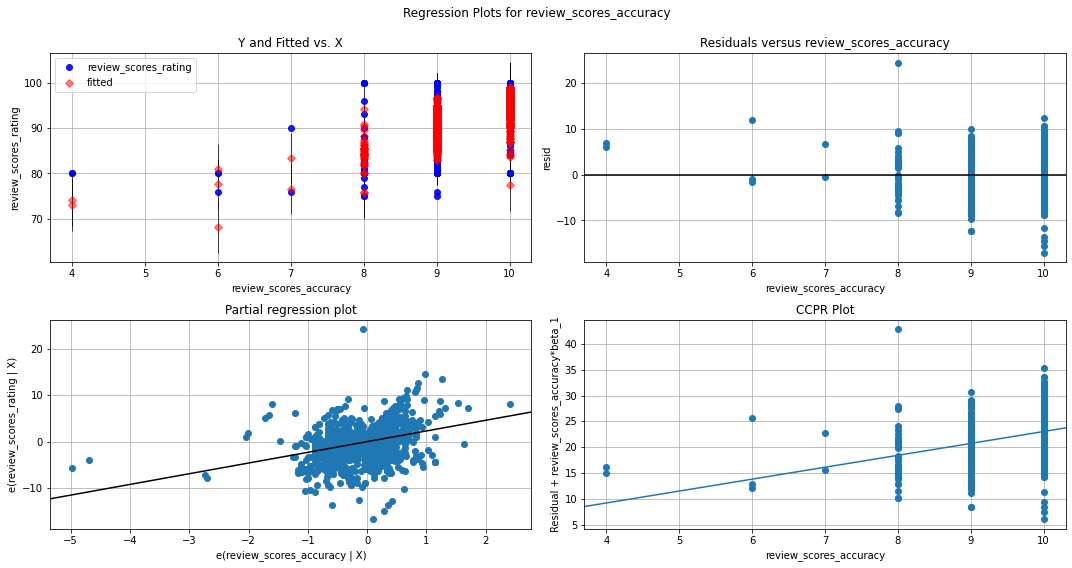

In [250]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "review_scores_accuracy", fig=fig)

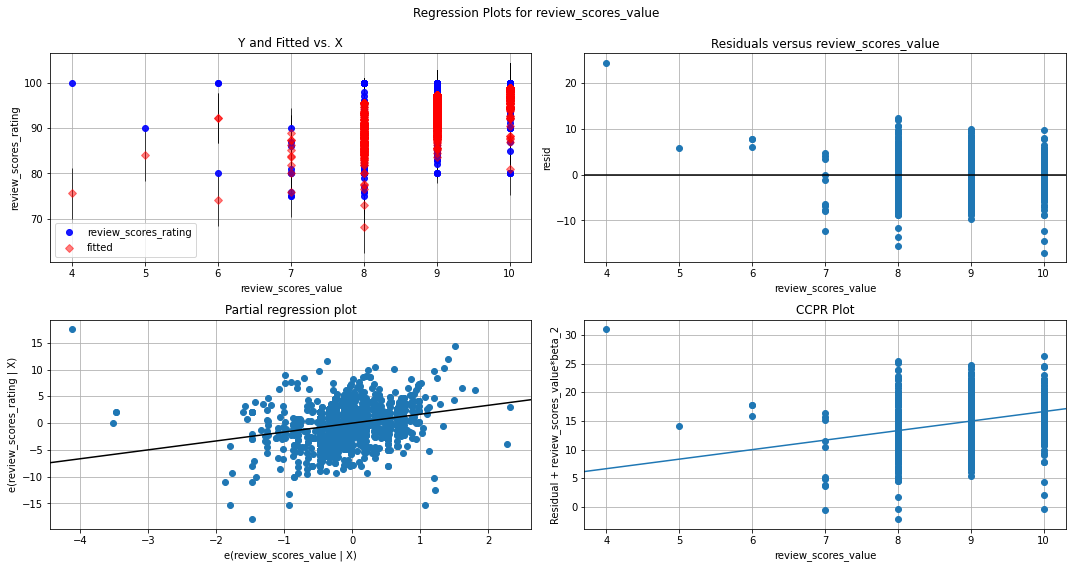

In [251]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "review_scores_value", fig=fig)

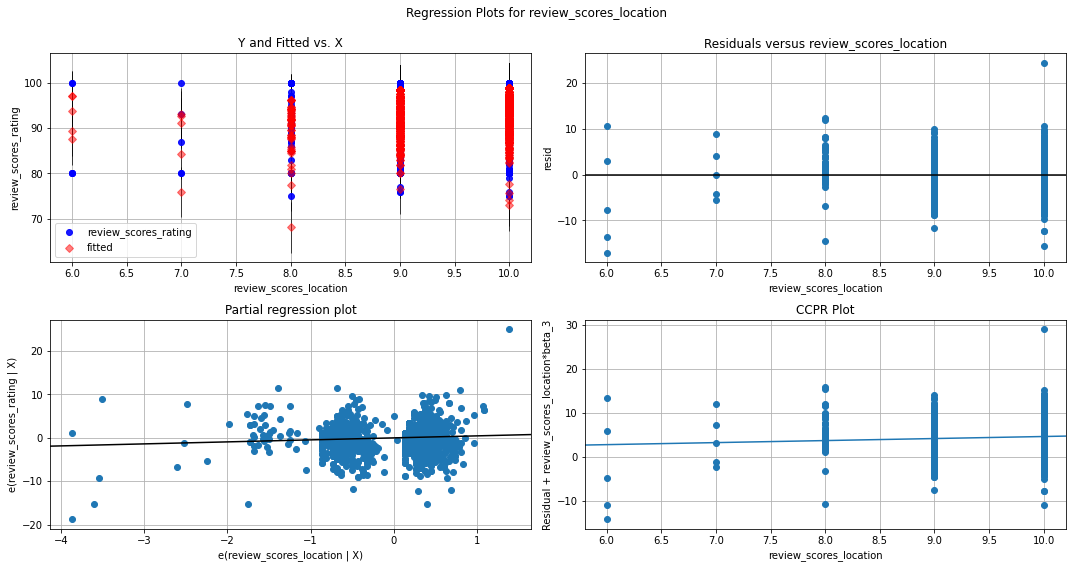

In [252]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "review_scores_location", fig=fig)

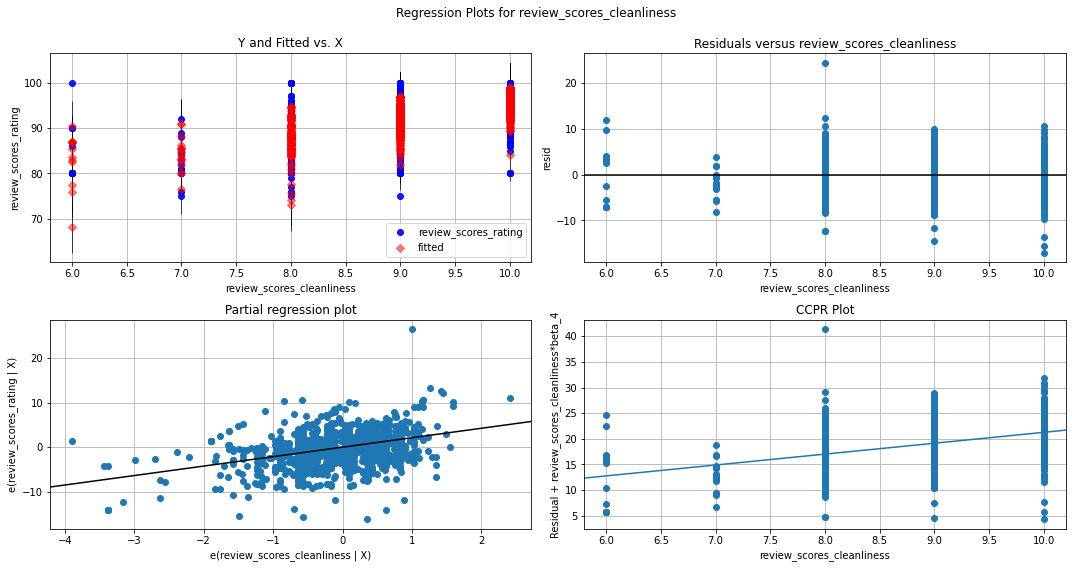

In [253]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "review_scores_cleanliness", fig=fig)

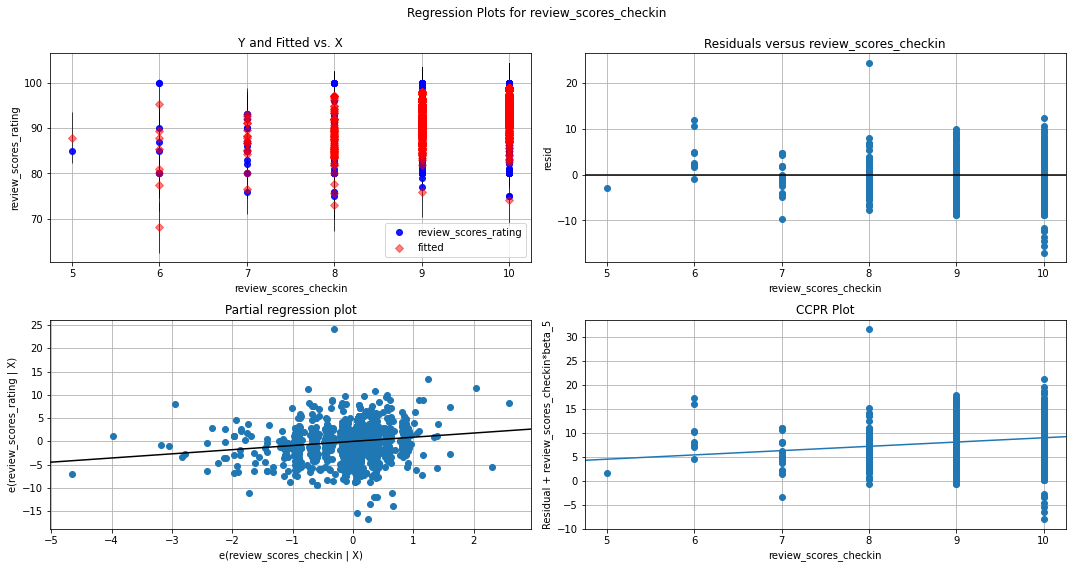

In [254]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "review_scores_checkin", fig=fig)

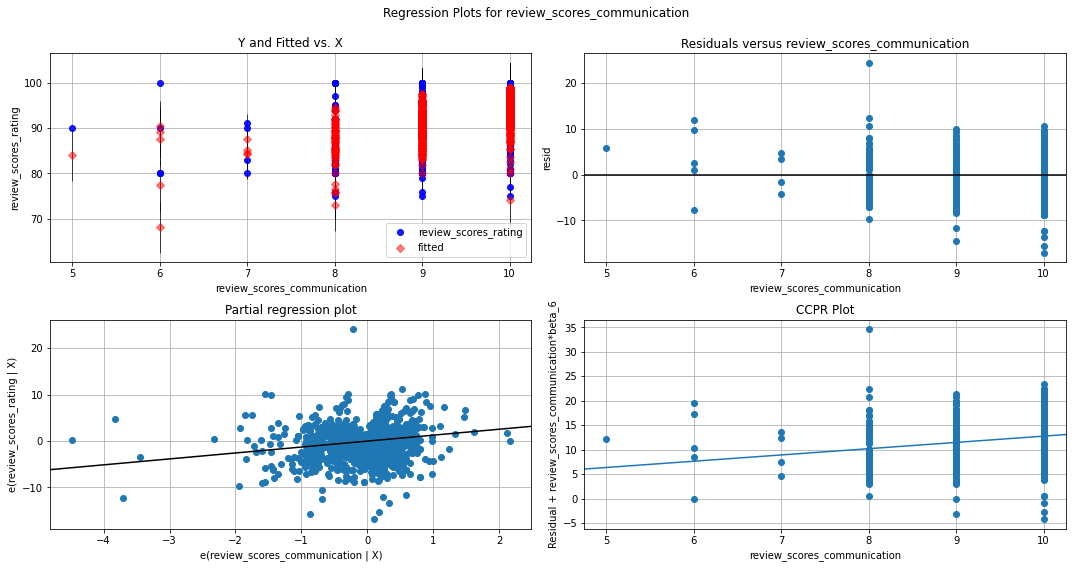

In [255]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "review_scores_communication", fig=fig)

**OLS Model:** review_scores_rating ~ all review variables + selected variables

Working off of the OLS model above, I combined the review variables with a few different variables to better explain review_scores_rating. Combining with these variables, I was able to increase the R-squared from 0.649 to 0.665.

When plotting beds, I noticed that in the partial regression plot, the predictions hovered evenly around both sides of 0.

In [256]:
mod = smf.ols(formula= 'review_scores_rating ~ transformed_price + catBathroom + catNeighborhood + beds + host_listings_count + catBathroom + catBook  + review_scores_accuracy + review_scores_value +  review_scores_location + review_scores_cleanliness + review_scores_checkin + review_scores_communication', data=ols_df)
res = mod.fit()
print (res.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.665
Model:                              OLS   Adj. R-squared:                  0.663
Method:                   Least Squares   F-statistic:                     383.5
Date:                  Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                          12:52:56   Log-Likelihood:                -5653.3
No. Observations:                  2330   AIC:                         1.133e+04
Df Residuals:                      2317   BIC:                         1.141e+04
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

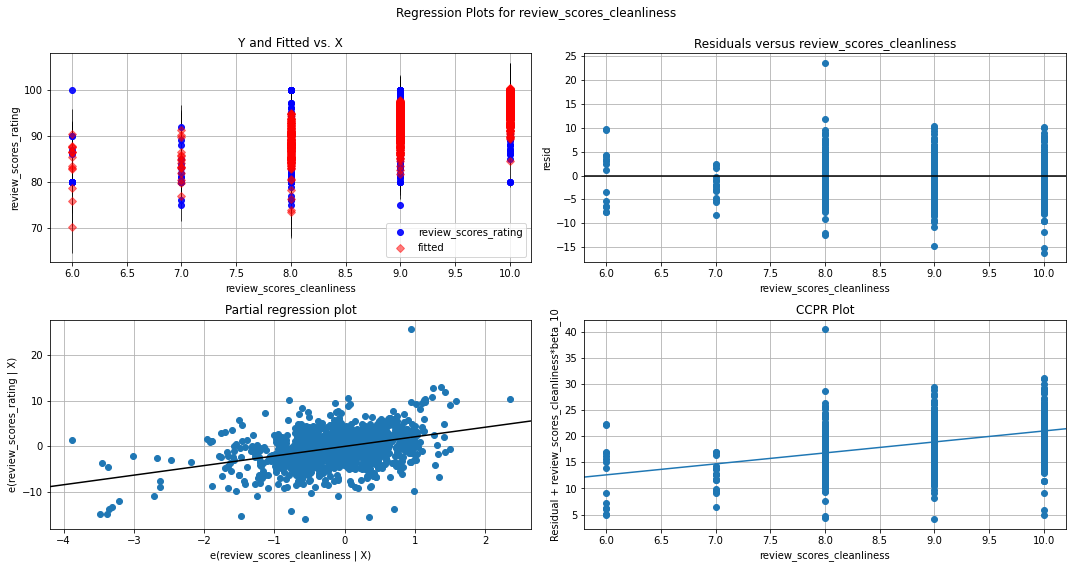

In [257]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "review_scores_cleanliness", fig=fig)

In [258]:
res.params

Intercept                      11.288091
transformed_price               0.845439
catBathroom                     0.077570
catNeighborhood                 0.053406
beds                           -0.221911
host_listings_count            -0.017284
catBook                         0.346146
review_scores_accuracy          2.244016
review_scores_value             1.625156
review_scores_location          0.499635
review_scores_cleanliness       2.101582
review_scores_checkin           0.666037
review_scores_communication     1.190522
dtype: float64

In [259]:
mod = smf.ols(formula= 'review_scores_rating ~ transformed_price + catBathroom + beds + catNeighborhood + catBathroom + catResponseTime + catBook + review_scores_accuracy + review_scores_value +  review_scores_location + review_scores_cleanliness + review_scores_checkin + review_scores_communication', data=ols_df)
res = mod.fit()
print (res.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.661
Model:                              OLS   Adj. R-squared:                  0.660
Method:                   Least Squares   F-statistic:                     377.1
Date:                  Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                          12:52:58   Log-Likelihood:                -5666.4
No. Observations:                  2330   AIC:                         1.136e+04
Df Residuals:                      2317   BIC:                         1.143e+04
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

# 5b. OLS Model: transformed_price 

**OLS Model:** transformed_price - identifiying predictors that have multi-collinearity with price. When building these OLS models, I had noticed that some predictors resulted in the condition number > 1 which indicates multi-collinearity.

In [260]:
ols_df.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_tenure', 'year_host_since', 'month_host_since', '

The condition number is large (indicating multi-collinearity) when creating a model predicting transformed_price with the following variables: 
- name
- description
- host_id
- review_scores_rating
- host_tenure
- year_host_since
- month_host_since


In [261]:
mod = smf.ols(formula='transformed_price ~ review_scores_rating', data=ols_df)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     14.52
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           0.000142
Time:                        12:52:58   Log-Likelihood:                -2245.2
No. Observations:                2330   AIC:                             4494.
Df Residuals:                    2328   BIC:                             4506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.7780 

In [262]:
ols_df.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_tenure', 'year_host_since', 'month_host_since', '

**OLS Model:** transformed_price ~ accommodation type variables

When testing price using linear regression models, I hypothesized that the accommodation types (beds, bedrooms, bathrooms, property type, room type) could influence the price. I created an OLS model that predicts price using those variables. 

The R2 value is 0.546 which means that 54.6% of the variance in price can be predicted via these variables. 

**Neighbourhoods:** Looking at the neighbourhood_cleansed variable, all of the p-values are > 0.05 which means that this variable is not statistically signficant. 

**Property Type:** Entire apartments, entire condominions, entire guesthouse, entire houses, entire lofts, entire serviced apartment, entire townhous, houseboats, all private rooms (except serviced apartments and villas), all rooms (except in villas, apartment hotels, serviced apartments), shared rooms in apartments, shared rooms in hostels, and tiny houses are statistically signficant with p-values < 0.05.

**Bathroom Type:** 3.5 baths (0.019) and 4 baths (0.008) are statistically signficant with p-values < 0.05.

**Accommodates:** This is statistically signficant with p-value at almost 0 (0.000).

**catRoom:** This is not statistically signfificant statistically signficant with p-value at 0.06.

**Beds:** This is not statistically significant with p-value at 0.463. 

**Bedrooms:** This is statistically signficant with p-value at almost 0 (0.000).

Re-running the OLS model without beds and catRoom decreased R2 from 0.546 to 0.545.

In [263]:
mod = smf.ols(formula='transformed_price ~  neighbourhood_cleansed + property_type  + catRoom +  accommodates + beds + bedrooms + bathrooms_text', data=ols_df)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     34.23
Date:                Mon, 15 Mar 2021   Prob (F-statistic):          4.94e-324
Time:                        12:52:58   Log-Likelihood:                -1332.8
No. Observations:                2330   AIC:                             2826.
Df Residuals:                    2250   BIC:                             3286.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

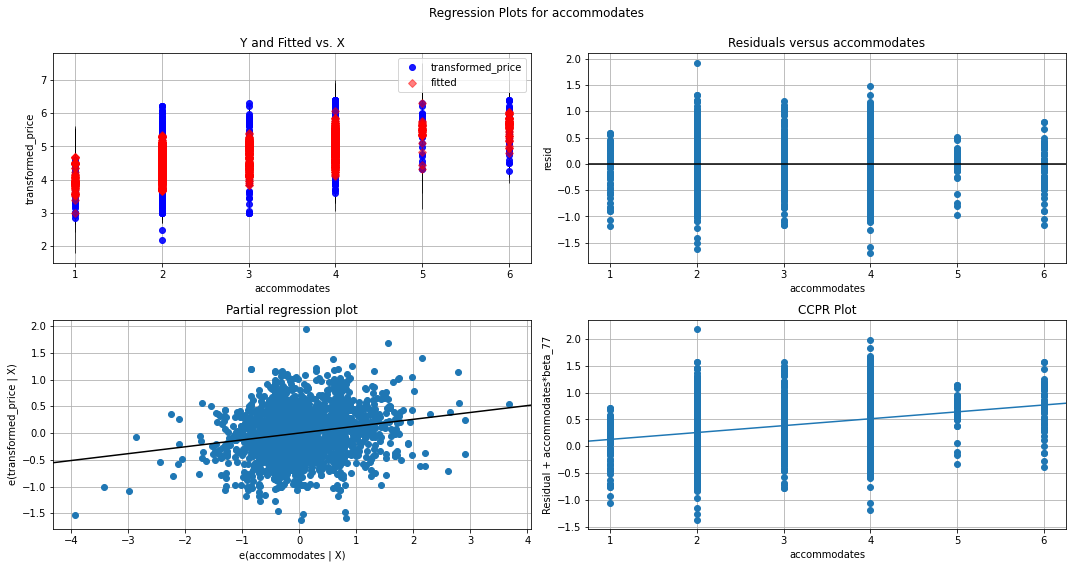

In [264]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "accommodates", fig=fig)


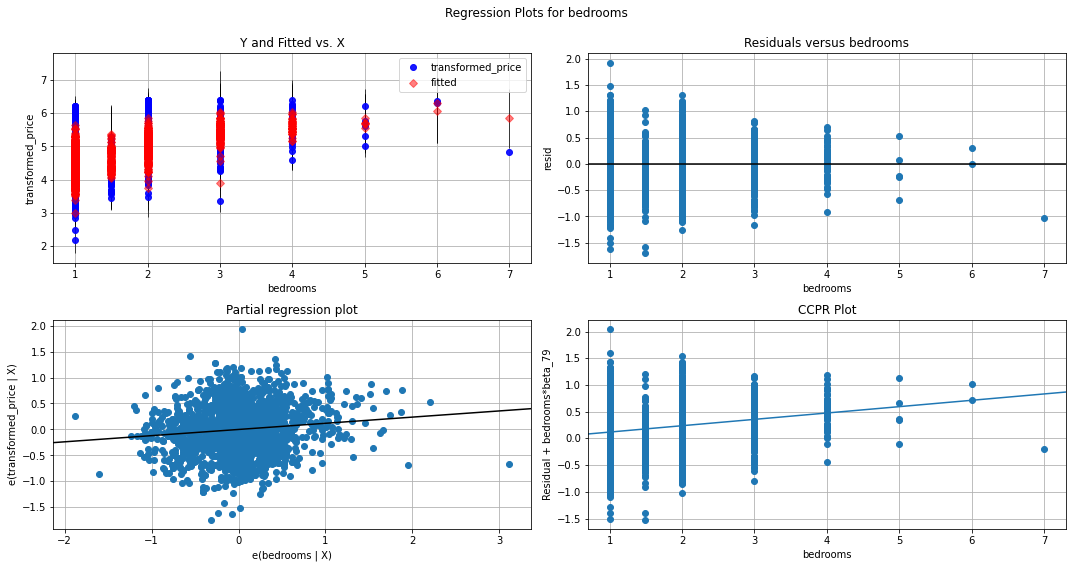

In [265]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "bedrooms", fig=fig)


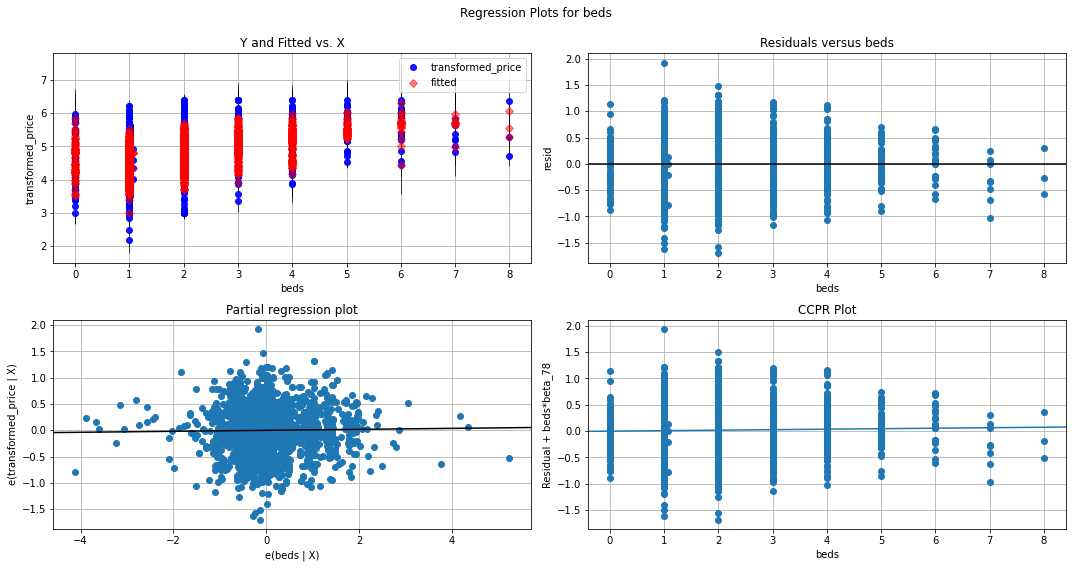

In [266]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "beds", fig=fig)


In [267]:
# re-running model without beds because it was not statistically significant
mod = smf.ols(formula='transformed_price ~  neighbourhood_cleansed + property_type  +  accommodates + bedrooms + bathrooms_text', data=ols_df)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     35.04
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:53:03   Log-Likelihood:                -1335.0
No. Observations:                2330   AIC:                             2826.
Df Residuals:                    2252   BIC:                             3275.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

**OLS Model:** transformed_price ~ accommodation type variables + other variables

Building off the previous model, I included more variables (review_scores_value + review_scores_accuracy + host_neighbourhood + catNeighborhood +  catBathroom) to better fit the model. 

The R2 value increased from 0.546 to 0.568 which means that 56.8% of the variance in price can be predicted via these variables. 


In [268]:
ols_df.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_tenure', 'year_host_since', 'month_host_since', '

In [269]:
# indications of multicollinearity when adding host_listings_count
mod = smf.ols(formula='transformed_price ~ host_listings_count + review_scores_accuracy + host_neighbourhood  + property_type + accommodates + bedrooms', data=ols_df)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     31.96
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:53:03   Log-Likelihood:                -1260.0
No. Observations:                2330   AIC:                             2710.
Df Residuals:                    2235   BIC:                             3257.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [270]:
mod = smf.ols(formula='transformed_price ~ review_scores_accuracy + host_neighbourhood  + property_type + accommodates + bedrooms', data=ols_df)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     31.54
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:53:03   Log-Likelihood:                -1276.2
No. Observations:                2330   AIC:                             2740.
Df Residuals:                    2236   BIC:                             3281.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [271]:
res.params

Intercept                                    4.057296
host_neighbourhood[T.Banne Buiksloot]       -0.550465
host_neighbourhood[T.Beguinage-Dixmude]      0.852829
host_neighbourhood[T.Belváros]              -1.010096
host_neighbourhood[T.Bos en Lommer]         -0.374598
                                               ...   
property_type[T.Shared room in houseboat]   -0.082949
property_type[T.Tiny house]                 -0.965245
review_scores_accuracy                       0.078345
accommodates                                 0.134797
bedrooms                                     0.141680
Length: 94, dtype: float64

In [272]:
# attempting different linear combinations
mod = smf.ols(formula='transformed_price ~  review_scores_value + review_scores_accuracy + host_neighbourhood + catNeighborhood + catBathroom + property_type + catRoom + catBook +  accommodates + beds + bedrooms', data=ols_df)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     29.92
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:53:04   Log-Likelihood:                -1267.9
No. Observations:                2330   AIC:                             2736.
Df Residuals:                    2230   BIC:                             3311.
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

**OLS Model:** transformed_price ~ accommodation type variables + factorized variables

Using the accommodation type variables, I created an OLS model with the factorized variables (catNeighborhood + catProperty + catRoom + catBathroom + catBook). Factorizing these variables, the variance gets absorbed each variable which resulted in a lower R2 value at 0.444.

In [273]:
mod = smf.ols(formula='transformed_price ~  catNeighborhood + catProperty + catRoom + catBathroom + catBook +  accommodates + beds + bedrooms', data=ols_df)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:      transformed_price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     231.4
Date:                Mon, 15 Mar 2021   Prob (F-statistic):          6.53e-289
Time:                        12:53:04   Log-Likelihood:                -1569.3
No. Observations:                2330   AIC:                             3157.
Df Residuals:                    2321   BIC:                             3208.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8217      0.033    1

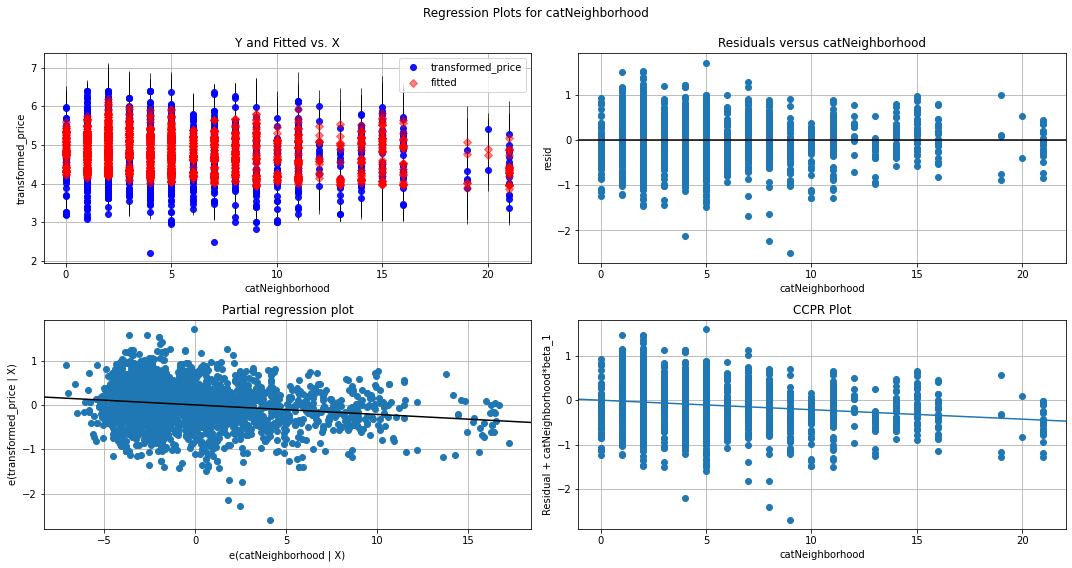

In [274]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res, "catNeighborhood", fig=fig)


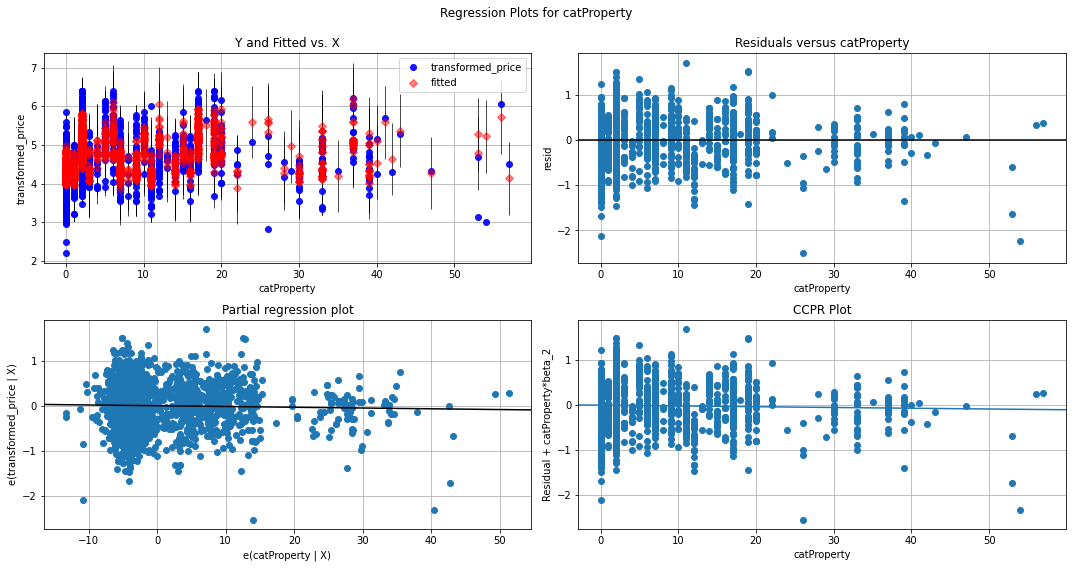

In [275]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(res,'catProperty', fig=fig)


In [276]:
res.params

Intercept          3.821707
catNeighborhood   -0.021382
catProperty       -0.001696
catRoom            0.439419
catBathroom        0.005267
catBook            0.081034
accommodates       0.163996
beds               0.003554
bedrooms           0.163003
dtype: float64

# Summary

For this project, I analyzed the Airbnb dataset through the following steps: 

1. Initial Exploratory Analysis
2. Data Cleaning
3. Imputation
4. Linear Regression Models & Testing
5. OLS Regression Analysis

**Initial Exploratory Analysis**

During this stage, I explored the data by using pandas to analyze the variable contents, data types, duplicate values, missing values, and relationships between each variable. I plotted distribution plots, histogram, correlation plots, boxplots, and countplots to get a visual idea of where the data was distributed and their relation to one another. 

*Results: During this stage, I developed a better understanding of my data and could identify key initial steps to clean the dataset. At this point, I had preliminary notes of which variables I expected would have an impact on price and reviews_score_rating however, I needed to clean up the noise to get a better view of the data trends.*

**Data Cleaning**

To clean the data, I used the initial exploratory analysis to identify key areas to target. I removed NaN columns and extraneous columns in order to focus my data set. I removed skewed data for Price, Accommodates, Bedrooms, Bed, Review_scores_rating, and rows where the first_review and last_review is NaN. At the completion of the data cleaning, I had filtered out 17.14% of data, leaving 82.86% in my dataset. 

*Results: During this stage, I cleaned up the dataset and got a more focused view of the data.* 

**Imputation**

After running the is.null() function, I noticed there were still rows with NaN values after cleaning the data. To handle this missing data, I used two methods. For beds and bedrooms, I imputed the missing values with their respective mean values. For the host_response_time variable, I imputed the variables with a unique value "U". 

*Results: I handled my missing data through imputation which allowed my dataset to remain robust but also removed NaNs so that I could perform my testing.*

**Linear Regression Models & Testing**

I focused on two variables - price and reviews_scores_rating to perform the linear regression modeling. I explored the skewness of these two variables and created a test dataset to conduct my models. I selected the variables based on my previous analyses and hypotheses. After creating the models, I plotted the linear regression and residuals and analyzed the results. Note - I used the log transformation for price as the predictor.

Train/Test Split: 66:33

*Results: I created Linear Regression Models to predict price and reviews_scores_rating using several variables.* 

Review_scores_rating Linear Regression Models: 
- review_scores_accuracy R2 = 0.31 
- review_scores_cleanliness R2 = 0.31 
- review_scores_value R2 = 0.29
- review_scores_communication R2 = 0.29
- review_scores_location R2 = 0.07 

transformed_price Linear Regression Models: 
- accommodates R2 = 0.26 
- bedrooms R2 = 0.21 
- beds R2 = 0.2
- catRoom R2 = 0.19
- reviews_scores_rating R2 = 0.02
- catNeighborhood R2 = 0.02
- catProperty R2 = 0.0

**OLS Regression Analysis**

With the linear regression testing, I created OLS models predicting transformed_price and reviews_scores_rating with selected variables.

Results:

**OLS: review_scores_rating**
While this was not necessary for the assignment, I was curious about the review_scores_rating and built two models to predict review_scores_rating. 

1) review_scores_rating x review variables (R2 = 0.65) 
- This model uses review variables (review_scores_rating ~ review_scores_accuracy + review_scores_value +  review_scores_location + review_scores_cleanliness + review_scores_checkin + review_scores_communication) based on the previous linear regression tests
- I hypothesized that these review variables would influence the overall review_score_rating - as one review variable increases, the overall review_score_rating will increase. 
- The p-values for each of these variables are statistically signficant because they are less than 0.05.
- There was no multi-collinearity
- The distribution of residuals indicates homoscedasticity 

2) review_scores_rating x review variables + selected variables (R2 = 0.65) 
- This model uses the above review variables and selected variables(transformed_price + catBathroom + catNeighborhood + beds + host_listings_count + catBathroom + catBook)
- The p-values for each of these variables are statistically signficant because they are less than 0.05.
- There was no multi-collinearity
- The distribution of residuals indicates homoscedasticity 

**OLS: transformed_price**
I built three models to predict transformed_price. 

1) transformed_price x accommodation type variables (R2 = 0.546)
- This model used accomodation type variables (accommodates + bedrooms + beds + catBathrooms + catRoom + property_type + neighbourhood_cleansed)
- With my previous analyses, I hypothesized that the accommodations of the rental could influence the price. All variables were statistically signficant (p-values < 0.05) except for catRoom and beds. When re-running the model without these variables, the R2 decreased slightly from 0.546 to 0.545.
- There was no multi-collinearity
- The distribution of residuals indicates homoscedasticity 

2) transformed_price x accommodation type variables + selected variables (R2 = 0.568)
- This model used accomodation type variables from the above model plus selected variables (review_scores_accuracy + host_neighbourhood  + property_type + accommodates + bedrooms)
- To select the above variables, I would add in a variable one at a time and determine if there were any signfificant changes or if it caused multi-collinearity. For those variables, I did not include it within the model. 
- There was no multi-collinearity
- The distribution of residuals indicates homoscedasticity 

3) transformed_price ~ accommodation type variables + factorized variables (R2 = 0.444)
- This model used accommodation type variables and factorized, categorical variables (catNeighborhood + catProperty + catRoom + catBathroom + catBook +  accommodates + beds + bedrooms)
- Factorizing these variables, the variance gets absorbed each variable which resulted in a lower R2 value at 0.444.
- There was no multi-collinearity
- The distribution of residuals indicates homoscedasticity 


